# <a id='toc1_'></a>[Amazon Software Products Recommender System](#toc0_)

>  we build several types of recommender systems, including a content based and collaborative filtering model to generate recommendations for software products for customers on amazon. We also look at metrics to measure the performance of our models.

<img src="/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/My Github/Recommender-Systems/img/AMZN.jpeg" width="850" height="350">

**Table of contents**<a id='toc0_'></a>    

- [Overview](#toc2_)    
  - [Data](#toc2_1_)    
- [Model Evaluations and Metrics](#toc3_)    
    - [Content Based Filtering Model](#toc3_1_1_)    
    - [Collaborative Filtering Model](#toc3_1_2_)    
    - [Other Metrics](#toc3_1_3_)    
- [Setup and Data Loading](#toc4_)    
- [Data Exploration](#toc5_)    
- [Data Cleaning](#toc6_)    
- [Sentiment Analysis](#toc7_)    
    - [Sentiment Lexicons](#toc7_1_1_)    
    - [Review text by Customers](#toc7_1_2_)    
    - [Tokenization](#toc7_1_3_)    
    - [Feature Generation](#toc7_1_4_)    
- [Collaborative Filtering](#toc8_)    
  - [Non-Negative Matrix Factorisation (NMF)](#toc8_1_)    
    - [Process or Methodology](#toc8_1_1_)    
    - [Model Evaluation](#toc8_1_2_)    
  - [Neural Collaborative Filtering (NCF)](#toc8_2_)    
    - [Process or Methodology](#toc8_2_1_)    
    - [Model Evaluation](#toc8_2_2_)    
- [Content Based Filtering](#toc9_)    
    - [Metadata](#toc9_1_1_)    
    - [Methodology](#toc9_1_2_)    
      - [Review Text as Metadata](#toc9_1_2_1_)    
      - [Sentiments as Metadata](#toc9_1_2_2_)    
      - [Summary of Steps](#toc9_1_2_3_)    
  - [Using Sentiment with Text Metadata](#toc9_2_)    
  - [Using Text Metadata Alone](#toc9_3_)    
  - [Model Evaluation](#toc9_4_)    
- [Discussion and Conclusion](#toc10_)    
  - [Drawbacks - Collaborative Filtering](#toc10_1_)    
  - [Drawbacks - Content Based Filtering](#toc10_2_)    
    - [Serendipity Problem](#toc10_2_1_)    
    - [Content Based Filtering for Ratings Prediction](#toc10_2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[Overview](#toc0_)

In this project, we work with an amazon dataset which has product review information with over 12 000 reviews across over 800 software products on Amazon. THe goal of the project is develop three different types of recommender systems - collaborative filtering system, content based filtering system and a hybrid recommender system. Within each of these types of recommenders we may build one or more models. We also perform sentiment analysis to assess the emotion or feeling around a user's review. 

***We also consider using sentiment analysis to generate possible features to include in our recommender models***.


## <a id='toc2_1_'></a>[Data](#toc0_)

We use an **amazon product review dataset** made available in 2018. The dataset is an updated version of the ***Amazon review dataset*** released in 2014. As in the previous version, this dataset includes **reviews** (ratings, text, helpfulness votes), product **metadata** (descriptions, category information, price, brand, and image features). We shall make use of a smaller subset of the original data. Specifically, we have the amazon product review dataset for software products only! For more information look at the dataset [homepage](https://nijianmo.github.io/amazon/index.html). 

    The dataset has over 12 000 customer reviews and has over 800 software products sold on Amazon.

***
# <a id='toc3_'></a>[Model Evaluations and Metrics](#toc0_)

There are a variety of metrics we can use to assess our models. Some of which are given below (which we shall use):

- ***Root Mean Squared Error (RMSE)***: This is a common metric used in collaborative filtering to evaluate the accuracy of the predicted ratings. You can calculate the **RMSE** by comparing the predicted ratings to the actual ratings in the dataset.

- ***Precision and Recall***: Precision measures the proportion of recommended items that are relevant to the user, while recall measures the proportion of relevant items that are recommended. You can compute precision and recall at different cutoff points in the ranked list, and use them to evaluate the trade-off between precision and recall

- ***Mean Average Precision (MAP)***: This metric is used to evaluate the quality of the ranked list of recommendations. It is calculated by averaging the precision at different cutoff points in the ranked list. A higher **MAP** indicates that the recommender system is able to recommend relevant items to users.

- ***Normalized Discounted Cumulative Gain (NDCG)***: This metric is used to evaluate the quality of the ranked list of recommendations. It is calculated by averaging the precision at different cutoff points in the ranked list. A higher **NDCG** indicates that the recommender system is able to recommend relevant items to users. **NDCG** assigns higher scores to relevant items that appear higher in the list, and is therefore a good measure of the overall quality of the recommendations

To compute these metrics, you would need a **test set of user-item interactions**, with a set of items that the user has interacted with in the past and a set of items that the user has not interacted with. 

### <a id='toc3_1_1_'></a>[Content Based Filtering Model](#toc0_)

We can then use your content-based filtering model to generate a ranked list of recommendations for each user, and compare the list to the actual set of items that the user has interacted with in the past. The metrics above can be used to evaluate the performance of the model based on the overlap between the recommended items and the actual items of interest to the user. For this project we use NDCG for evaluating our content based model. 

This is because we shall use content based filtering model to recommend items to a user based on the items that the user has interacted with in the past. We are not looking to predict the ratings that a user would give to an item, but rather to recommend items to a user based on the items that the user has interacted with in the past.

### <a id='toc3_1_2_'></a>[Collaborative Filtering Model](#toc0_)

Collaborative filtering model can be assessed using the same metrics as content-based filtering. However, for this project, we shall be using the **RMSE** metric to evaluate the performance of the collaborative filtering model.

This is because we shall use collaborative filtering model to predict the ratings that a user would give to an item, and the ratings are continuous values. We can then compare the predicted ratings to the actual ratings in the dataset to calculate the **RMSE**.

### <a id='toc3_1_3_'></a>[Other Metrics](#toc0_)

- ***Coverage***: This metric measures the percentage of unique items that are recommended to at least one user. A higher coverage indicates that the recommender system is able to recommend a wider variety of items to users.

- ***Diversity***: This metric measures the diversity of the recommendations, and is used to ensure that the recommender system is not always recommending the same set of items to all users. A higher diversity indicates that the recommender system is able to recommend a wider variety of items to different users.


***
# <a id='toc4_'></a>[Setup and Data Loading](#toc0_)

We begin by loading the packages for this project. We then load the datasets with our product reviews and product metadata. We then seek to merge them. 

In [3]:
# get modules 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [4]:
# read in data
soft_data = pd.read_json('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/My Github/Recommender-Systems/Data/Amazon Data/Software_5.json',lines=True)

# view data
display(soft_data.head(3))
print("shape of Data:", soft_data.shape)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,False,"10 20, 2010",A38NELQT98S4H8,0321719816,{'Format:': ' DVD-ROM'},WB Halper,I've been using Dreamweaver (and it's predeces...,A solid overview of Dreamweaver CS5,1287532800,NaN,NaN
1,4,False,"10 18, 2010",A3QJU4FEN8PQSZ,0321719816,{'Format:': ' DVD-ROM'},Grimmy,"The demo is done with the PC version, with ref...",A good value,1287360000,NaN,NaN
2,5,False,"10 16, 2010",ACJT8MUC0LRF0,0321719816,{'Format:': ' DVD-ROM'},D. Fowler,If you've been wanting to learn how to create ...,This is excellent software for those who want ...,1287187200,3,NaN


shape of Data: (12805, 12)


By setting `lines=True`, `pandas.read_json()` reads the JSON file line by line, treating each line as a separate JSON object. This is useful when you have a file that contains multiple JSON objects, each on a separate line, as is often the case with log files or other data sources that generate JSON data.



In [5]:
# structure
soft_data.dtypes

# trim data 
soft_data = soft_data[[ 'reviewerID', 'reviewerName', 'asin', 'reviewText', 'overall']]

# see new data
soft_data.head(3)

,reviewerID,reviewerName,asin,reviewText,overall
0,A38NELQT98S4H8,WB Halper,0321719816,I've been using Dreamweaver (and it's predeces...,4
1,A3QJU4FEN8PQSZ,Grimmy,0321719816,"The demo is done with the PC version, with ref...",4
2,ACJT8MUC0LRF0,D. Fowler,0321719816,If you've been wanting to learn how to create ...,5


In [6]:
# read in metadata
meta = pd.read_json('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/My Github/Recommender-Systems/Data/Amazon Data/meta_Software.json',lines=True)

# remove irrelevant columns
meta = meta[['asin', 'title', 'description', 'brand', 'price']]
meta.head(2)

,asin,title,description,brand,price
0,0030672120,HOLT PHYSICS LESSON PRESENTATION CD-ROM QUICK ...,[],HOLT. RINEHART AND WINSTON,.a-box-inner{background-color:#fff}#alohaBuyBo...
1,0071480935,"Sing, Watch, &amp; Learn Spanish (DVD + Guide)...","[, <b>Latin rhythms that will get your kids si...",McGraw Hill,


In [7]:
# merge the data
soft_data = pd.merge(soft_data, meta[['asin', 'title', 'description', 'brand']], on='asin')

# view merged dataframe
soft_data.head(3)

,reviewerID,reviewerName,asin,reviewText,overall,title,description,brand
0,A38NELQT98S4H8,WB Halper,0321719816,I've been using Dreamweaver (and it's predeces...,4,Learn Adobe Dreamweaver CS5 by Video: Core Tra...,[This complete training program from Adobe Pre...,Peach Pit Press
1,A3QJU4FEN8PQSZ,Grimmy,0321719816,"The demo is done with the PC version, with ref...",4,Learn Adobe Dreamweaver CS5 by Video: Core Tra...,[This complete training program from Adobe Pre...,Peach Pit Press
2,ACJT8MUC0LRF0,D. Fowler,0321719816,If you've been wanting to learn how to create ...,5,Learn Adobe Dreamweaver CS5 by Video: Core Tra...,[This complete training program from Adobe Pre...,Peach Pit Press


***
# <a id='toc5_'></a>[Data Exploration](#toc0_)

In [8]:
# descriptive statistics for ratings
soft_data['overall'].describe()

count    14103.00000
mean         3.94214
std          1.35304
min          1.00000
25%          3.00000
50%          4.00000
75%          5.00000
max          5.00000
Name: overall, dtype: float64

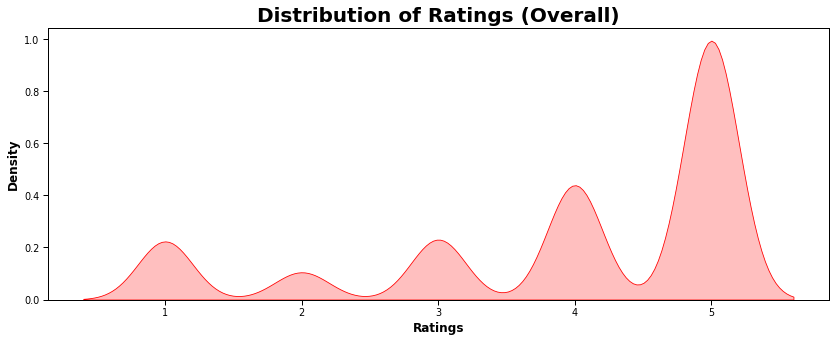

In [9]:
fig = plt.figure(figsize=(14,5))
sns.set_context("paper",font_scale=1.1)

ax = sns.kdeplot(soft_data['overall'],
                 color="Red", shade = True)
ax.set_ylabel('Density', fontsize=12, fontweight='bold')
ax.set_xlabel('Ratings', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Ratings (Overall)', fontsize=20, fontweight='bold');

In [10]:
# How many customers
print("Number of Customers:", soft_data.reviewerID.unique().size)

# Count Reviews and Average Rating per Customer
cust_data = soft_data.groupby(['reviewerID']).agg({"overall": ["count", "mean"]})
cust_data.columns = ['count_rev', 'mean_rat']
cust_data['mean_rat'] = np.round(cust_data.mean_rat,3)
display(cust_data.head(4))

Number of Customers: 1826


,count_rev,mean_rat
reviewerID,,
A100UD67AHFODS,5,4.80
A105S56ODHGJEK,29,3.69
A1075X1Q4M3S78,5,5.00
A10C5CJK1YKGV0,10,4.10


Text(0.5, 1.0, 'Average Ratings by Number of Reviews')

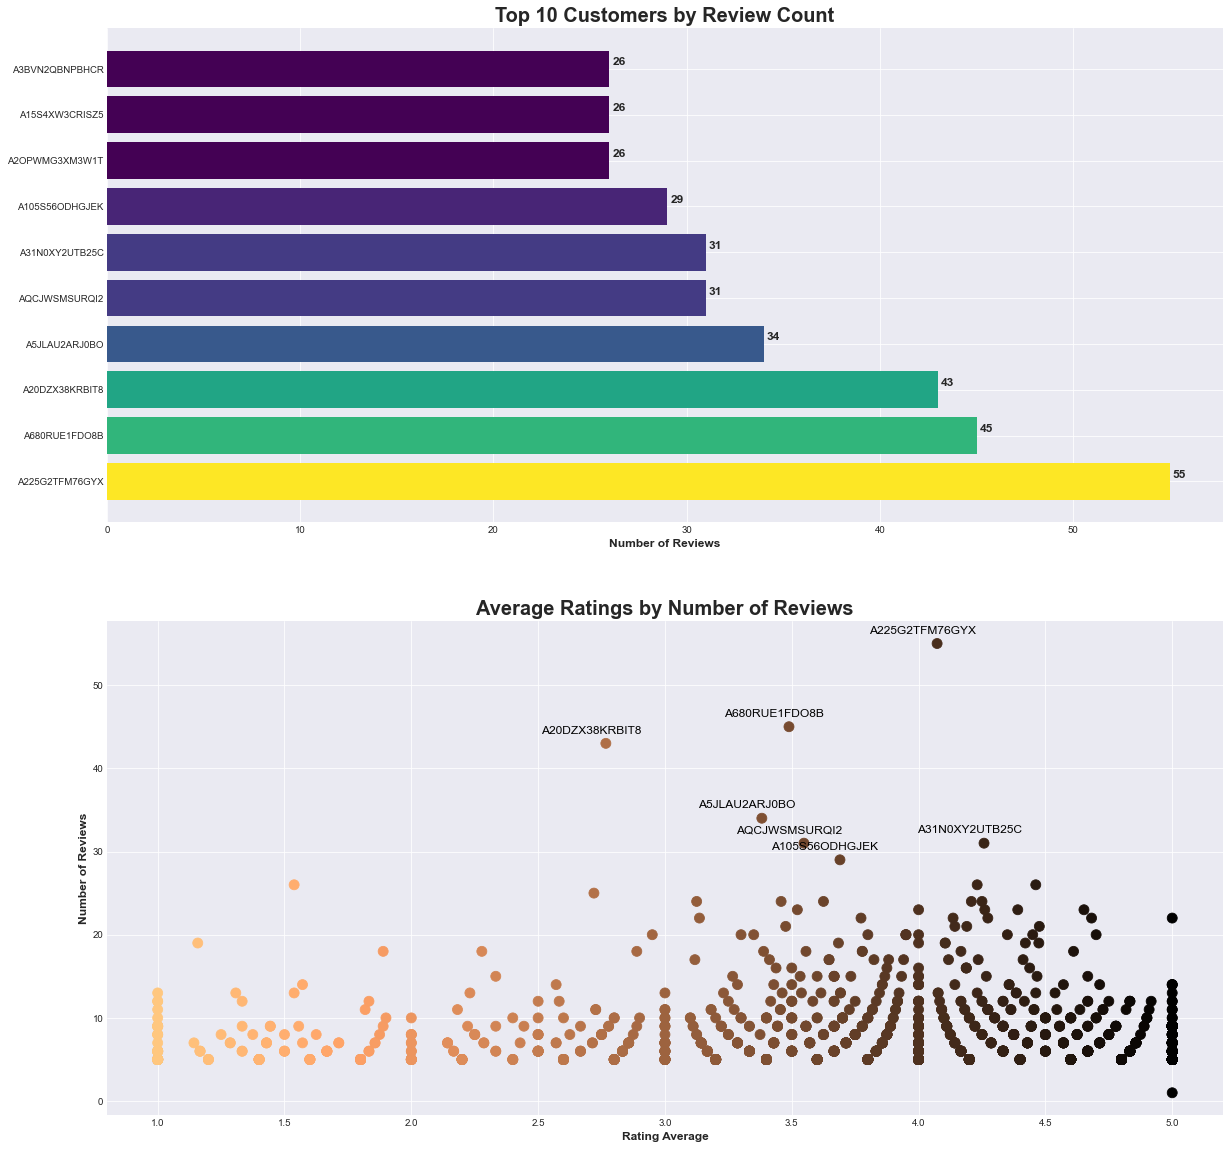

In [11]:
# Plot of Most - bar plot
plt.style.use('seaborn-darkgrid')
sample_top = cust_data.sort_values(['count_rev'], ascending=False).head(10)
count_min = sample_top.count_rev.min() # get range
count_max = sample_top.count_rev.max()
count_norm = (sample_top.count_rev - count_min) / (count_max - count_min) # Normalize 
colors = cm.viridis(count_norm) # Use a colormap to map vote average


fig = plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, color=colors)
plt.title("Top 10 Customers by Review Count", fontsize=20, fontweight='bold')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 25), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)

# Plot of Average Rating vs Count Reviews - scatter plot
plt.subplot(2, 1, 2)
plt.scatter(cust_data.mean_rat, cust_data.count_rev, c=cust_data.mean_rat, cmap='copper_r', s=100)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data.index):
    if (cust_data.count_rev[i] > 26):
        plt.annotate(id, (cust_data.loc[cust_data.index==id, "mean_rat"], cust_data.loc[cust_data.index==id, "count_rev"]), textcoords="offset points", xytext=(-15,10), ha='center', fontsize=12, color='black')
    else: continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')


In [12]:
# How many items/products?
print("Number of Products:", soft_data.asin.unique().size)

# Number reviews and average ratings per product
prod_data = soft_data.groupby(['asin']).agg({"overall": ["count", "mean"]})
prod_data.columns = ['count_rev', 'mean_rat']
prod_data['mean_rat'] = np.round(prod_data.mean_rat,3)
display(prod_data.head(4))

Number of Products: 802


,count_rev,mean_rat
asin,,
0321700945,8,4.750
0321719816,14,4.571
0321719824,9,4.222
0763855553,36,4.028


Text(0.5, 1.0, 'Average Ratings by Number of Reviews')

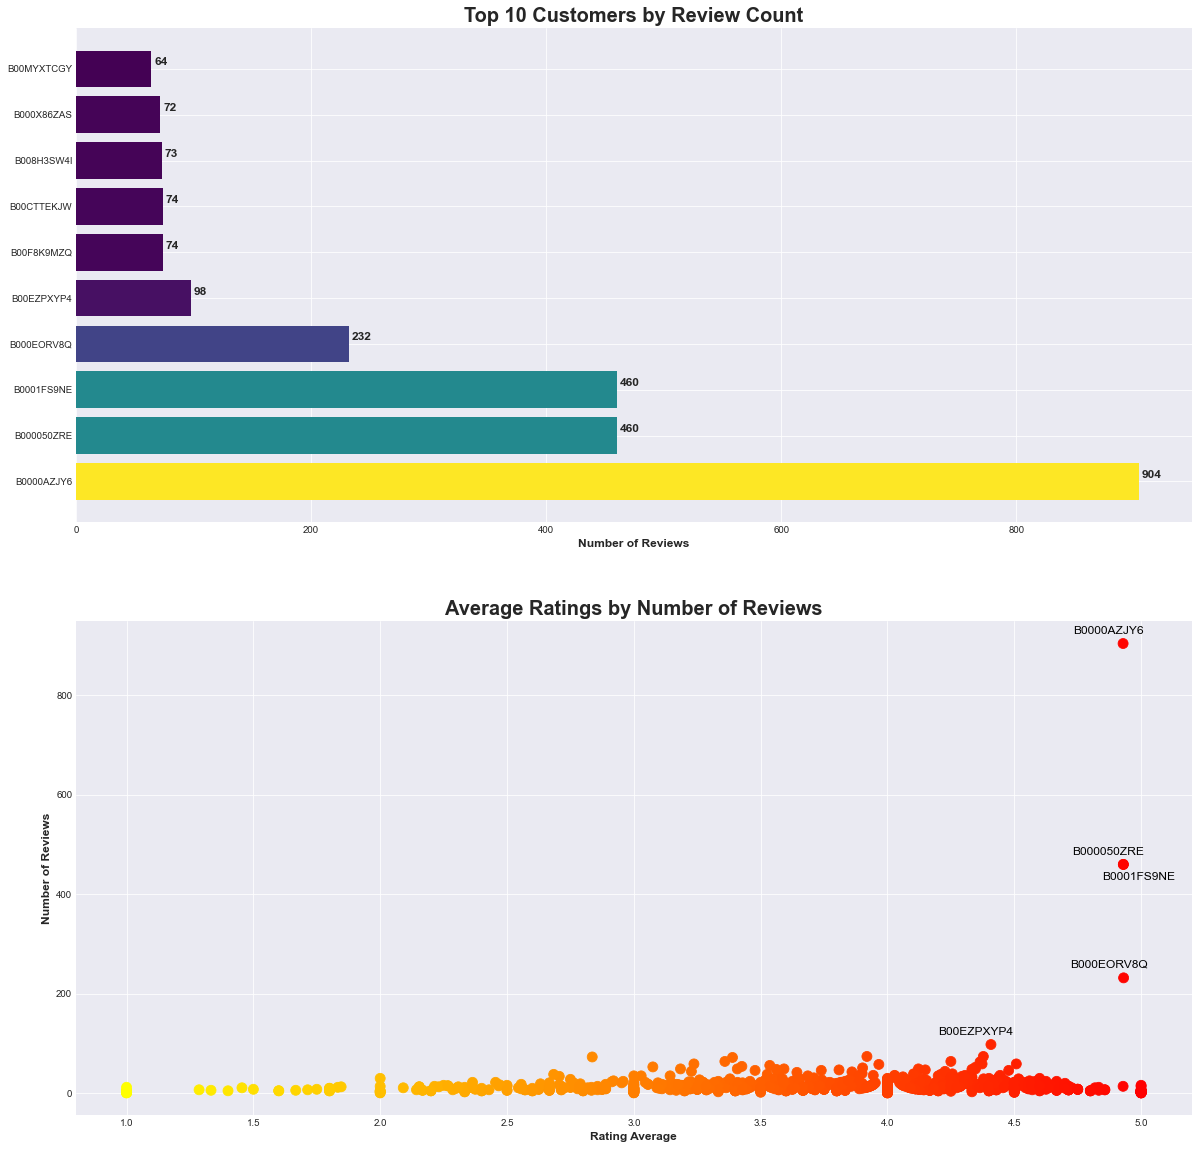

In [13]:
# Plot of Most / Fewest Reviews 
plt.style.use('seaborn-darkgrid')
sample_top = prod_data.sort_values(['count_rev'], ascending=False).head(10)
count_min = sample_top.count_rev.min() # get range
count_max = sample_top.count_rev.max()
count_norm = (sample_top.count_rev - count_min) / (count_max - count_min) # Normalize 
colors = cm.viridis(count_norm) # Use a colormap to map vote average

fig = plt.figure(figsize=(20, 20))
plt.subplot(2, 1, 1)
bar = plt.barh(y=sample_top.index, width=sample_top.count_rev, color=colors)
plt.title("Top 10 Customers by Review Count", fontsize=20, fontweight='bold')
plt.xlabel("Number of Reviews", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 25), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)

# Plot of Average Rating vs Count Reviews
plt.subplot(2, 1, 2)
plt.scatter(prod_data.mean_rat, prod_data.count_rev, c=prod_data.mean_rat, cmap='autumn_r', s=100)
plt.xlabel('Rating Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(prod_data.index):
    if (prod_data.count_rev[i] >= 98):
        if id == 'B0001FS9NE':
            xytext = (15, -15)
        else: xytext=(-15,10)
        plt.annotate(id, (prod_data.loc[prod_data.index==id, "mean_rat"], prod_data.loc[prod_data.index==id, "count_rev"]), textcoords="offset points",xytext=xytext, ha='center', fontsize=12, color='black')
    else: continue
plt.title("Average Ratings by Number of Reviews", fontsize=20, fontweight='bold')

***
# <a id='toc6_'></a>[Data Cleaning](#toc0_)

We are to clean our text features in our dataset, so as to prepare it for further analysis. This includes removing all punctuation marks, whitespace, make all text lowercase, and remove stop words as well as numbers if irrelevant. Specifically, we are interested in cleaning the following columns or features:

- ***reviewText***
- ***title***
- ***description***


More so we are interested in seeing if there is any **missing data** in the columns of interest and decide if imputation is necessary. Also we want to ensure the **data types** are correct for all the features. Finally, we want to ensure there are no **duplicated data**. 


 There are missing values in the data.


,reviewerID,reviewerName,asin,reviewText,overall,title,description,brand
5279,A1VQHH85U7PX0,NaN,B001EHXOFG,"Nowadays, I have grown to be very dependant on...",4,Microsoft Streets &amp; Trips 2009 [OLD VERSION],[NEW&#8212;Entertainment online&#8217;s FREE t...,Microsoft
5503,A1VQHH85U7PX0,NaN,B001TYYZCA,I used Corel Painter X before upgrading to Cor...,3,Corel Painter 11 [OLD VERSION],[Corel Painter 11 is the ultimate art studio f...,Corel
6012,A1VQHH85U7PX0,NaN,B002JB3CUS,PaperPort is a very helpful tool for reducing ...,4,"PaperPort 12 [Old Version]"" />",[Overwhelmed by paperwork? Feeling disorganize...,Nuance Dragon
6210,A1VQHH85U7PX0,NaN,B0039Y58YC,WordPerect X5 is an office suite consisting of...,5,WordPerfect Office X5 Standard [Old Version],"[Create great-looking documents, spreadsheets ...",Corel
9232,A1VQHH85U7PX0,NaN,B00CTTEKJW,I finally caved to Amazon's relentless efforts...,4,Amazon Music [PC] [Download],"[<table border=""0"" cellpadding=""5"" cellspacing...",Amazon Digital Services LLC



 Columns with Missing Data:
 reviewerID      0
reviewerName    9
asin            0
reviewText      1
overall         0
title           0
description     0
brand           0
dtype: int64


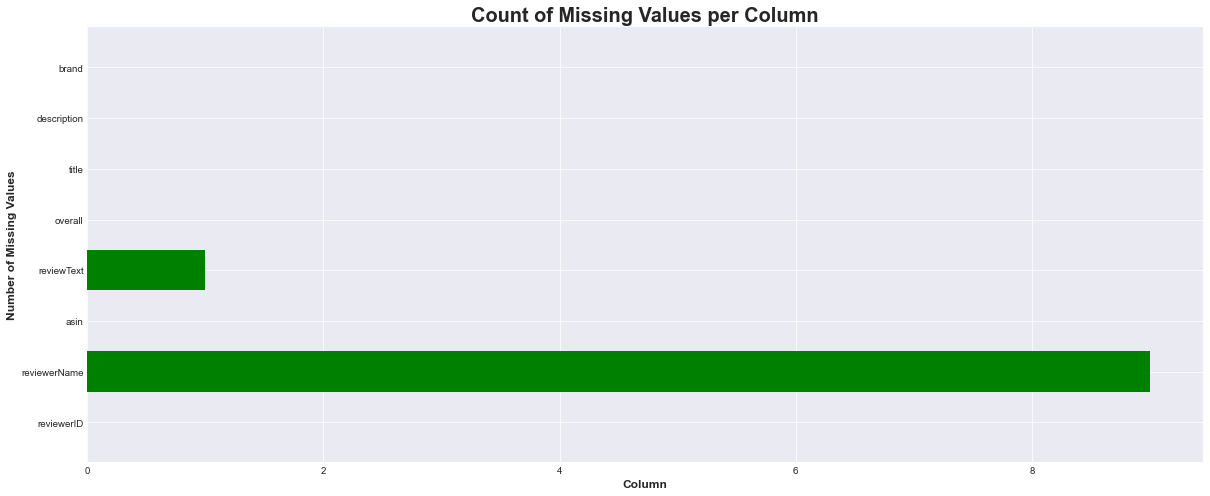

In [14]:
# check if any of the columns have missing values
is_na = soft_data.isna().any().any()

# if there are NA values in columns -> show rows, show number of NAs per column
if is_na:
    print("\n There are missing values in the data.")
    display(soft_data[soft_data.isna().any(axis=1)].head(5))
    print("\n Columns with Missing Data:\n", soft_data.isna().sum())
    missing_values_count = soft_data.isna().sum()
    plt.style.use('seaborn-darkgrid')
    fig = plt.figure(figsize=(20, 8))
    plt.barh(y=missing_values_count.index, width=missing_values_count.values, color="green")
    plt.xlabel("Column", fontsize=12, fontweight='semibold')
    plt.ylabel("Number of Missing Values", fontsize=12, fontweight='semibold')
    plt.title("Count of Missing Values per Column", fontsize=20, fontweight='bold')
    plt.show()

else:
    print("There are no missing values in the data.")

In [15]:
# remove rows with missing values for reviewerName
remove_ind = soft_data.loc[soft_data.isna().any(axis=1), 'reviewerName'].index
soft_data.drop(remove_ind, inplace=True)

# fill in missing values
soft_data.loc[soft_data.isna().any(axis=1), "reviewText"] = ""

# check for missing data
is_na = soft_data.isna().any().any()
if is_na: print("\n There are missing values in the data.")
else: print("There are no missing values in the data.")

There are no missing values in the data.


In [16]:
# make sure columns are text (strings)
soft_data['reviewText'] = soft_data['reviewText'].astype(str)
soft_data['title'] = soft_data['title'].astype(str)
soft_data['description'] = soft_data['description'].astype(str)
soft_data['brand'] = soft_data['brand'].astype(str)

# replace [] with title column
soft_data['description'] = soft_data['description'].str.replace(r'\[\]', '', regex=True)
mask = soft_data['description'] == ''
soft_data.loc[mask, 'description'] = soft_data.loc[mask, 'title'].fillna('')

In [17]:
# find any duplicate rows
soft_data.duplicated().any()

# show duplicate rows
soft_data[soft_data.duplicated()]

# remove duplicate rows
soft_data.drop_duplicates(inplace=True)

In [18]:
# load packages
import re

# function to clean text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text

# Clean text data
soft_data['new_review'] = soft_data['reviewText'].apply(clean_text)
soft_data['new_title'] = soft_data['title'].apply(clean_text)
soft_data['new_desc'] = soft_data['description'].apply(clean_text)
soft_data['new_brand'] = soft_data['brand'].apply(clean_text)
soft_data.head(3)[['new_review', 'new_title', 'new_desc', 'new_brand']]

,new_review,new_title,new_desc,new_brand
0,i ve been using dreamweaver and it s predecess...,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press
1,the demo is done with the pc version with refe...,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press
2,if you ve been wanting to learn how to create ...,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press


The code defines a function called `clean_text` that takes in a string `text` as input and returns the cleaned version of the string.

Here's a breakdown of what each line of the function does:

1. `text = text.lower()`: This line converts all uppercase characters in the string to lowercase. This step is usually performed in natural language processing to ensure that uppercase and lowercase versions of the same word are treated as the same.

2. `text = re.sub(r'[^a-zA-Z0-9]', ' ', text)`: This line uses the `re` module (short for regular expressions) to substitute any non-alphanumeric characters in the string with a space. The regular expression `[^a-zA-Z0-9]` matches any character that is not a letter or a number.

3. `text = re.sub(r'\s+', ' ', text)`: This line uses the re module to replace any sequences of one or more whitespace characters (such as spaces or tabs) with a single space.

4. `text = text.strip()`: This line removes any leading or trailing whitespace from the string.

5. `return text`: This line returns the cleaned version of the string.

Overall, this function is useful for cleaning up unstructured text data by removing non-alphanumeric characters and normalizing the case of the text. It can be used as a preprocessing step before performing tasks like sentiment analysis, topic modeling, or text classification.

***
# <a id='toc7_'></a>[Sentiment Analysis](#toc0_)

Sentiment analysis is the study of the emotional content of a body of text. 

- We shall look briefly at sentiment lexicons. 
- We shall then aggregating sentiments over words to assess sentiments of longer texts. 
- We shall also look at handling “negation” words like “not” that affect sentiment

### <a id='toc7_1_1_'></a>[Sentiment Lexicons](#toc0_)

One way of approaching the problem is to **assess the sentiment of individual words**, and then aggregate the sentiments of the words in a body of text in some way. For example, if we can classify whether each word is positive, negative, or neutral, we can count up the number of positive, negative, and neutral words in the document and define that as the sentiment of the document. This is just one way - a particularly simple way - of doing document-level sentiment analysis.

When assessing the sentiment or emotional content of individual words, we usually make use of **existing sentiment dictionaries (or “lexicons”)** that have already done this using some kind of manual classification.

> The gist is that we are dealing with a specific, pre-defined vocabulary.

> The goal is usually to assign a sentiment score to a text, possibly an overall score, or a generally positive or negative grade

***TLDR; Lexicons are dictionaries or lists that contain words with their corresponding positive or negative polarity scores***

We shall use three different lexicons:

1. **Bing**: a list of English words with their corresponding positive and negative polarity scores. The scores range from -5 (most negative) to 5 (most positive), with 0 indicating neutral sentiment.
2. **NRC**: a lexicon of English words with their corresponding scores on eight different emotions: anger, fear, anticipation, trust, surprise, sadness, joy, and disgust.
3. **AFINN**: a list of English words with their corresponding positive and negative polarity scores. The scores range from -5 (most negative) to 5 (most positive), with 0 indicating neutral sentiment.


In [19]:
# read lexicons in
afinn = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/My Github/Recommender-Systems/Data/Lexicons/Afinn.csv')
bing = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/My Github/Recommender-Systems/Data/Lexicons/Bing.csv')
nrc = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/My Github/Recommender-Systems/Data/Lexicons/NRC.csv')

# AFINN
print("Shape of AFINN:", afinn.shape)
print("Unique Sentiments:", afinn.value.unique())
display(afinn.head(5))

# BING
print("Shape of Bing:", bing.shape)
print("Unique Sentiments:", bing.sentiment.unique())
display(bing.head(5))

# NRC
print("Shape of NRC:", nrc.shape)
print("Unique Sentiments:", nrc.sentiment.unique())
display(nrc.head(5))


Shape of AFINN: (2477, 2)
Unique Sentiments: [-2 -3  2  1 -1  3  4 -4 -5  5  0]


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


Shape of Bing: (6786, 2)
Unique Sentiments: ['negative' 'positive']


,word,sentiment
0,faces,negative
1,abnormal,negative
2,abolish,negative
3,abominable,negative
4,abominably,negative


Shape of NRC: (13901, 2)
Unique Sentiments: ['trust' 'fear' 'negative' 'sadness' 'anger' 'surprise' 'positive'
 'disgust' 'joy' 'anticipation']


,word,sentiment
0,abacus,trust
1,abandon,fear
2,abandon,negative
3,abandon,sadness
4,abandoned,anger


### <a id='toc7_1_2_'></a>[Review text by Customers](#toc0_)

We look at the text of the reviews as a whole and calculate the sentiments for each review. This is done by using sentiment lexicons and breaking each review up into its constituent words and attaching a sentiment score to each word. We then sum of the sentiment scores for each word in a review and get the total sentiment for that review. This is done for all reviews. 

In [20]:
# Load AFINN
from afinn import Afinn

# Load the AFINN dictionary
afinn = Afinn()

# Define a function to calculate the sentiment score of each review
def get_sentiment_afinn(review):
    # Split the review into words
    words = review.split()
    # Calculate the sentiment score of each word using AFINN and sum the scores
    sentiment_score = sum(afinn.score(word) for word in words)
    return sentiment_score

# Apply the function to the 'review' column of your DataFrame
soft_data['sentiment_afinn'] = soft_data['new_review'].apply(get_sentiment_afinn)
soft_data[['new_review', 'sentiment_afinn']].head(4)

,new_review,sentiment_afinn
0,i ve been using dreamweaver and it s predecess...,17.0
1,the demo is done with the pc version with refe...,12.0
2,if you ve been wanting to learn how to create ...,47.0
3,i ve been creating websites with dreamweaver f...,26.0


The command `afinn.score(word)` returns the sentiment score of the word based on the **AFINN** dictionary. The sentiment score of each review is calculated by summing the sentiment scores of all the words in the review. The resulting sentiment scores are stored in a new `'sentiment_afinn'` column of the DataFrame.

In [21]:
# load packages for BING
from textblob import TextBlob
from textblob.sentiments import PatternAnalyzer

# function to calculate sentiment using bing
def get_sentiment_bing(text):
    sentiment = 0
    blob = TextBlob(text, analyzer=PatternAnalyzer())
    for sentence in blob.sentences:
        for word in sentence.words:
            polarity = TextBlob(word, analyzer=PatternAnalyzer()).sentiment.polarity
            if polarity > 0:
                sentiment += 1
            elif polarity < 0:
                sentiment -= 1
    return sentiment

# run function on reviews
soft_data['sentiment_bing'] = soft_data['new_review'].apply(get_sentiment_bing)
soft_data[['new_review', 'sentiment_bing']].head(3)

,new_review,sentiment_bing
0,i ve been using dreamweaver and it s predecess...,11
1,the demo is done with the pc version with refe...,-6
2,if you ve been wanting to learn how to create ...,24


> does sentiment analysis for all reviews using the Bing lexicon

This code defines a function `get_sentiment_bing()` that takes a text as input and returns its sentiment using the Bing lexicon. The function first creates a `TextBlob` object with the `PatternAnalyzer()` as the analyzer. It then iterates through each word in each sentence of the text, and uses the `TextBlob` object to get the polarity of each word. If the polarity is positive, the sentiment value is incremented by 1, and if it's negative, the sentiment value is decremented by 1. Finally, the function returns the sentiment value.

The last line of the code applies this function to the `'new_review'` column of the `'soft_data'` dataframe, and stores the sentiment value in a column. This will give you a new dataframe with a sentiment score for each review.

In [22]:
# Number reviews and sentiment per customer
cust_data = soft_data.groupby(['reviewerID']).agg({"sentiment_afinn": ["count", "mean"], "sentiment_bing": ["mean"]})
cust_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing']
cust_data = np.round(cust_data, 2)

# Number reviews and sentiment per product
prod_data = soft_data.groupby(['asin']).agg({"sentiment_afinn": ["count", "mean"], "sentiment_bing": ["mean"]})
prod_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing']
prod_data = np.round(prod_data, 2)

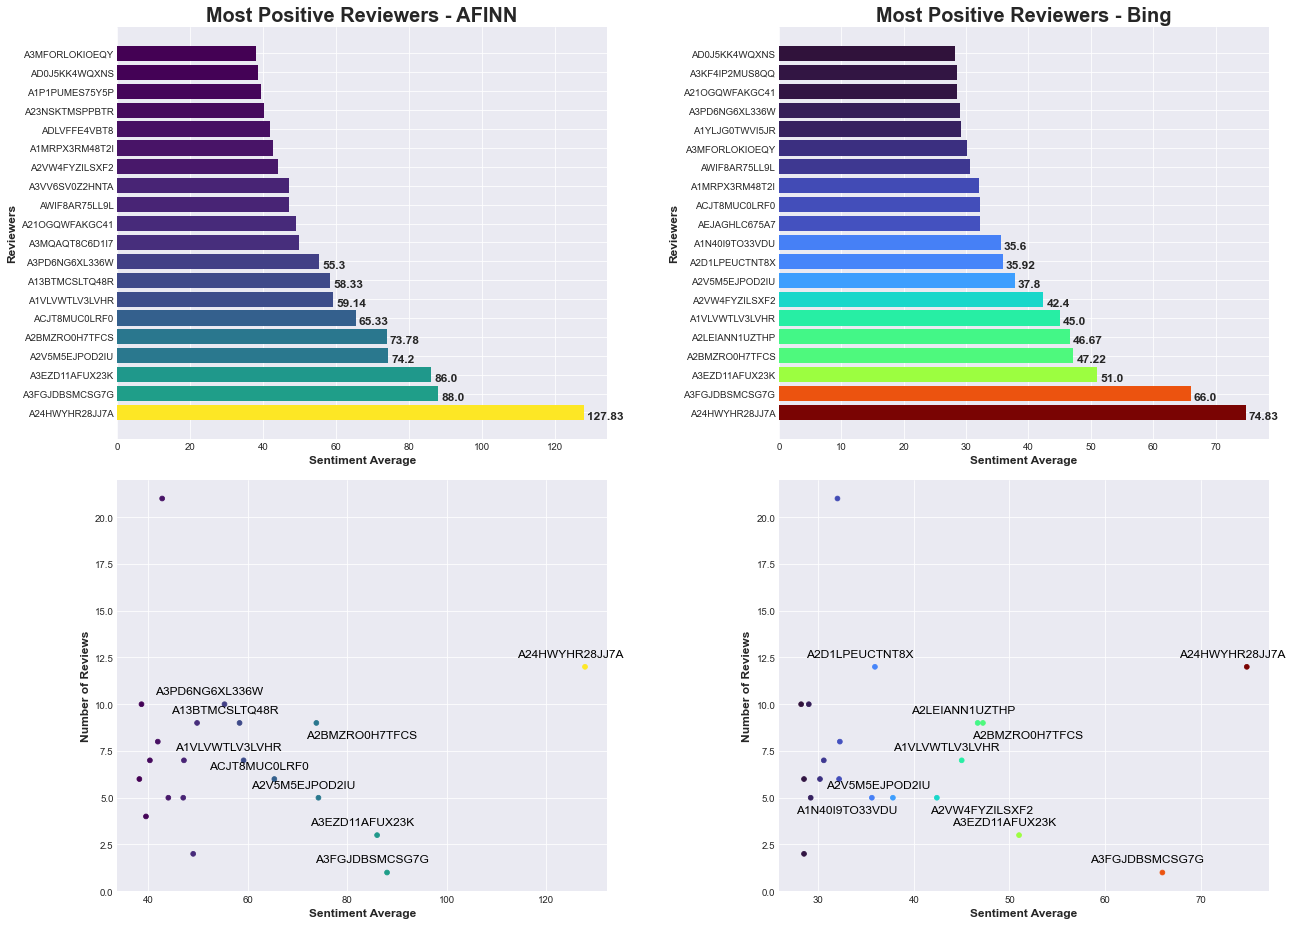

In [23]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 15))


# Most Positive - AFINN
cust_data1 = cust_data.sort_values(['mean_sent_afinn'], ascending=False)
cust_data1 = cust_data1.head(20)
sent_min = cust_data1.mean_sent_afinn.min() 
sent_max = cust_data1.mean_sent_afinn.max()
sent_norm = (cust_data1.mean_sent_afinn - sent_min) / (sent_max - sent_min) 
colors_afinn = cm.viridis(sent_norm) 

plt.subplot(2, 2, 1)
bar = plt.barh(y=cust_data1.index, width=cust_data1.mean_sent_afinn, color=colors_afinn)
plt.title("Most Positive Reviewers - AFINN", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height > 50:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
    else: continue


plt.subplot(2, 2, 3)
plt.scatter(cust_data1.mean_sent_afinn, cust_data1.count_rev, c=colors_afinn, cmap='viridis')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data1.index):
    if cust_data1.mean_sent_afinn[i] > 50:
        if id == "A2BMZRO0H7TFCS":
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_afinn"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(45,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_afinn"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')

    else: continue

# Most Positive - BING
cust_data1 = cust_data.sort_values(['mean_sent_bing'], ascending=False).head(20)
sent_min = cust_data1.mean_sent_bing.min()
sent_max = cust_data1.mean_sent_bing.max()
sent_norm = (cust_data1.mean_sent_bing - sent_min) / (sent_max - sent_min) 
colors_bing = cm.turbo(sent_norm) 

plt.subplot(2, 2, 2)
bar = plt.barh(y=cust_data1.index, width=cust_data1.mean_sent_bing, color=colors_bing)
plt.title("Most Positive Reviewers - Bing", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height > 35:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)
    else: continue


plt.subplot(2, 2, 4)
plt.scatter(cust_data1.mean_sent_bing, cust_data1.count_rev, c=colors_bing, cmap='turbo')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data1.index):
    if cust_data1.mean_sent_bing[i] > 35:
        if (id == "A2BMZRO0H7TFCS") or (id == "A2VW4FYZILSXF2"):
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_bing"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(45,-15), ha='center', fontsize=12, color='black')
        elif (id == "A1N40I9TO33VDU"):
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_bing"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-25,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data1.loc[cust_data1.index==id, "mean_sent_bing"], cust_data1.loc[cust_data1.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')
    else: continue
    

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.1)


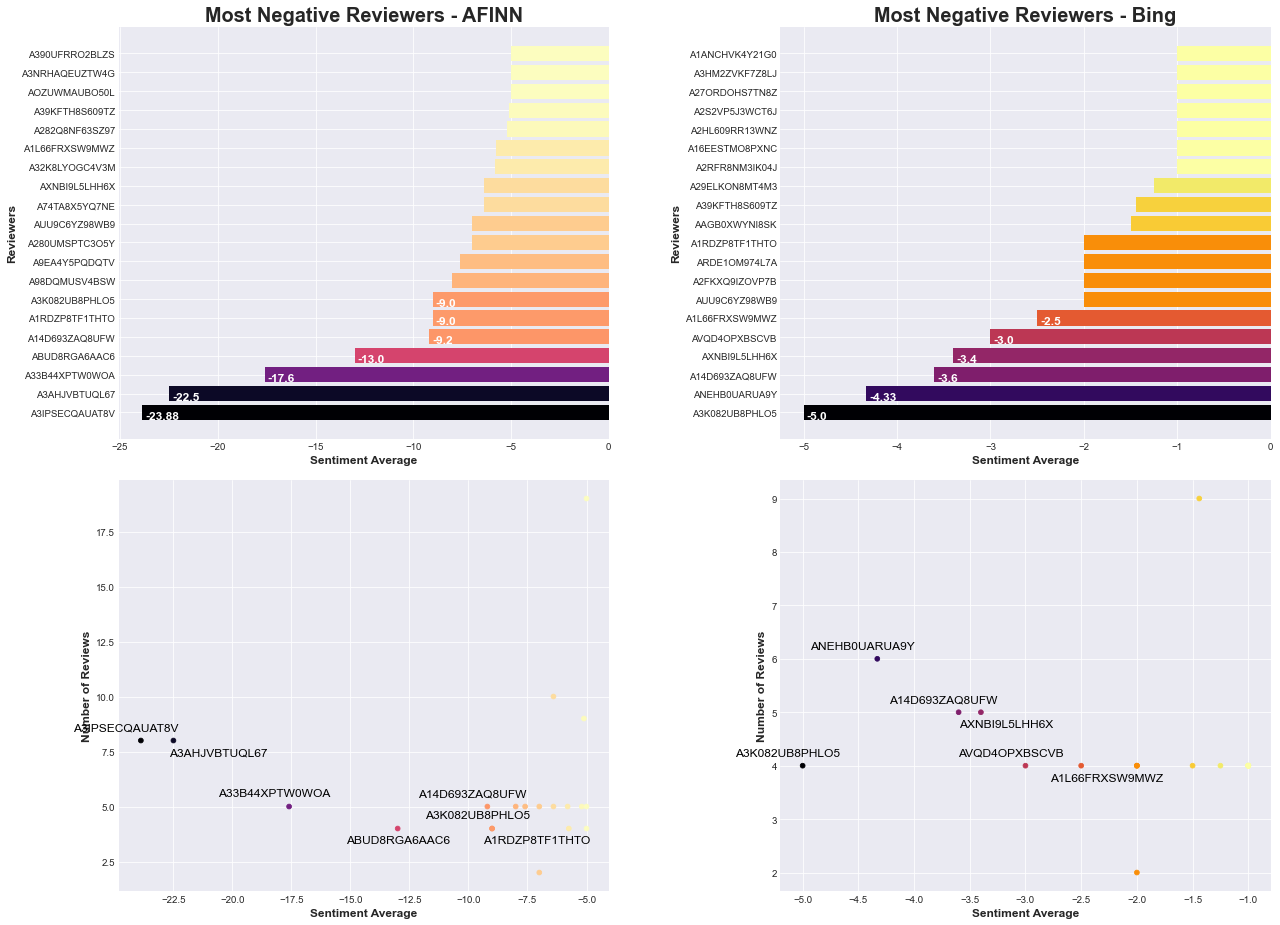

In [24]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 15))


# Most Negative - AFINN
cust_data2 = cust_data.sort_values(['mean_sent_afinn'], ascending=True)
cust_data2 = cust_data2.head(20)
sent_min = cust_data2.mean_sent_afinn.min() 
sent_max = cust_data2.mean_sent_afinn.max()
sent_norm = (cust_data2.mean_sent_afinn - sent_min) / (sent_max - sent_min) 
colors_afinn = cm.magma(sent_norm) 

plt.subplot(2, 2, 1)
bar = plt.barh(y=cust_data2.index, width=cust_data2.mean_sent_afinn, color=colors_afinn)
plt.title("Most Negative Reviewers - AFINN", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height < -8:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12, 
                color = 'white')
    else: continue


plt.subplot(2, 2, 3)
plt.scatter(cust_data2.mean_sent_afinn, cust_data2.count_rev, c=colors_afinn, cmap='magma')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data2.index):
    if cust_data2.mean_sent_afinn[i] < -8:
        if (id == "A3AHJVBTUQL67") or (id == "A1RDZP8TF1THTO") :
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_afinn"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(45,-15), ha='center', fontsize=12, color='black')
        elif (id == "ABUD8RGA6AAC6"):
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_afinn"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(0,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_afinn"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')

    else: continue

# Most Negative - BING
cust_data2 = cust_data.sort_values(['mean_sent_bing'], ascending=True)
cust_data2 = cust_data2.head(20)
sent_min = cust_data2.mean_sent_bing.min()
sent_max = cust_data2.mean_sent_bing.max()
sent_norm = (cust_data2.mean_sent_bing - sent_min) / (sent_max - sent_min) 
colors_bing = cm.inferno(sent_norm) 

plt.subplot(2, 2, 2)
bar = plt.barh(y=cust_data2.index, width=cust_data2.mean_sent_bing, color=colors_bing)
plt.title("Most Negative Reviewers - Bing", fontsize=20, fontweight='bold')
plt.xlabel("Sentiment Average", fontsize=12, fontweight='semibold')
plt.ylabel("Reviewers", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    if height < -2:
        plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 4), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12, 
                color = 'white')
    else: continue


plt.subplot(2, 2, 4)
plt.scatter(cust_data2.mean_sent_bing, cust_data2.count_rev, c=colors_bing, cmap='inferno')
plt.xlabel('Sentiment Average', fontsize=12, fontweight='semibold')
plt.ylabel('Number of Reviews', fontsize=12, fontweight='semibold')
for i, id in enumerate(cust_data2.index):
    if cust_data2.mean_sent_bing[i] < -2:
        if (id == "AXNBI9L5LHH6X") or (id == "A1L66FRXSW9MWZ"):
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_bing"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(25,-15), ha='center', fontsize=12, color='black')
        else: 
            plt.annotate(id, (cust_data2.loc[cust_data2.index==id, "mean_sent_bing"], cust_data2.loc[cust_data2.index==id, "count_rev"]),
                 textcoords="offset points",
                 xytext=(-15,10), ha='center', fontsize=12, color='black')
    else: continue
    

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.1)


In [25]:
# Number reviews and sentiment per product - more than 20 reviews per product
prod_data = soft_data.groupby(['asin']).agg({"sentiment_afinn": ["count", "mean"], "sentiment_bing": ["mean"]})
prod_data.columns = ['count_rev', 'mean_sent_afinn', 'mean_sent_bing']
prod_data = prod_data[prod_data['count_rev'] > 20]
prod_data = np.round(prod_data, 2)

# get index of top 6 products with highest and lowest sentiment averages
top6_prod_afinn = prod_data.sort_values(['mean_sent_afinn'], ascending=False).index[0:5] # TOP 6 products with highest sentiment average - afinn
low_6_prod_afinn = prod_data.sort_values(['mean_sent_afinn'], ascending=True).index[0:5] # TOP 6 products with highest sentiment average - afinn
top6_prod_bing = prod_data.sort_values(['mean_sent_bing'], ascending=False).index[0:5] # BOTTOM 6 products with lowest sentiment average - bing
low_6_prod_bing = prod_data.sort_values(['mean_sent_bing'], ascending=True).index[0:5] # BOTTOM 6 products with lowest sentiment average - bing


# get all rows for product index 
top6_prod_afinn_data = soft_data[soft_data['asin'].isin(top6_prod_afinn)]
low_6_prod_afinn_data = soft_data[soft_data['asin'].isin(low_6_prod_afinn)]
top6_prod_bing_data = soft_data[soft_data['asin'].isin(top6_prod_bing)]
low_6_prod_bing_data = soft_data[soft_data['asin'].isin(low_6_prod_bing)]

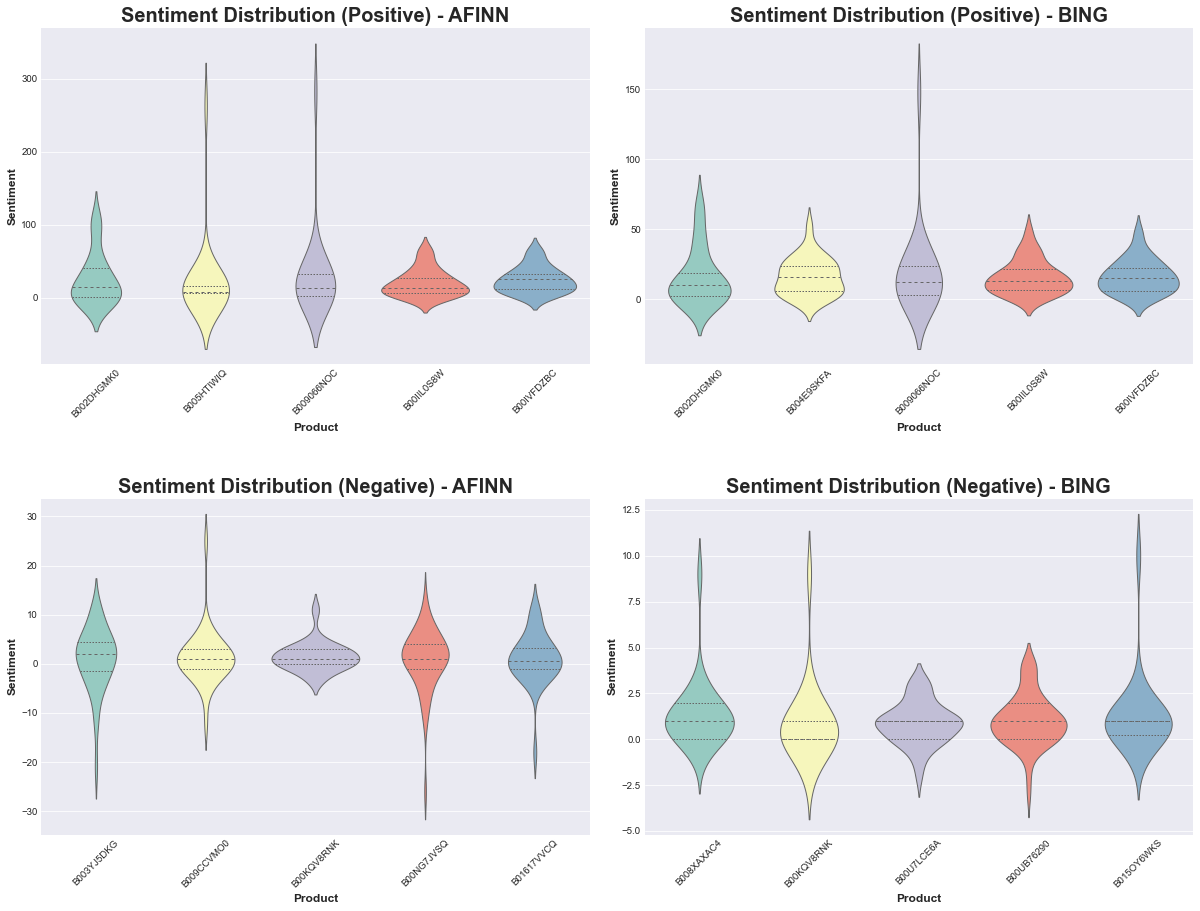

In [26]:
fig = plt.figure(figsize=(20, 14))
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.4)


# AFINN
# plot a violin plot for each product in prod_afinn_data using seaborn for sentiment afinn 
plt.subplot(2, 2, 1)
sns.violinplot(x="asin", y="sentiment_afinn", data=top6_prod_afinn_data, palette="Set3", linewidth=1, inner="quartile")
plt.title("Sentiment Distribution (Positive) - AFINN", fontsize=20, fontweight='bold')
plt.xlabel("Product", fontsize=12, fontweight='semibold')
plt.ylabel("Sentiment", fontsize=12, fontweight='semibold')
plt.xticks(rotation=45)


plt.subplot(2, 2, 3)
sns.violinplot(x="asin", y="sentiment_afinn", data=low_6_prod_afinn_data, palette="Set3", linewidth=1, inner="quartile")
plt.title("Sentiment Distribution (Negative) - AFINN", fontsize=20, fontweight='bold')
plt.xlabel("Product", fontsize=12, fontweight='semibold')
plt.ylabel("Sentiment", fontsize=12, fontweight='semibold')
plt.xticks(rotation=45)


# BING
# plot a violin plot for each product in prod_bing_data using seaborn for sentiment bing
plt.subplot(2, 2, 2)
sns.violinplot(x="asin", y="sentiment_bing", data=top6_prod_bing_data, palette="Set3", linewidth=1, inner="quartile")
plt.title("Sentiment Distribution (Positive) - BING", fontsize=20, fontweight='bold')
plt.xlabel("Product", fontsize=12, fontweight='semibold')
plt.ylabel("Sentiment", fontsize=12, fontweight='semibold')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.violinplot(x="asin", y="sentiment_bing", data=low_6_prod_bing_data, palette="Set3", linewidth=1, inner="quartile")
plt.title("Sentiment Distribution (Negative) - BING", fontsize=20, fontweight='bold')
plt.xlabel("Product", fontsize=12, fontweight='semibold')
plt.ylabel("Sentiment", fontsize=12, fontweight='semibold')
plt.xticks(rotation=45);


In [27]:
# functions which returns the number of positive, negative and neutral reviews for each product
def get_pos_neg_neu_bing(df):
    df_pos = df[df['sentiment_bing'] > 0]
    df_neg = df[df['sentiment_bing'] < 0]
    df_neu = df[df['sentiment_bing'] == 0]
    df_pos = df_pos.groupby(['asin']).agg({"sentiment_bing": ["count"]})
    df_neg = df_neg.groupby(['asin']).agg({"sentiment_bing": ["count"]})
    df_neu = df_neu.groupby(['asin']).agg({"sentiment_bing": ["count"]})
    df_pos = df_pos.merge(df_neg, on='asin', how='outer')
    df_pos = df_pos.merge(df_neu, on='asin', how='outer')
    df_pos.columns = ['pos', 'neg', 'neu']
    df_pos = df_pos.fillna(0)
    df_pos = df_pos.astype(int)
    return df_pos


def get_pos_neg_neu_afinn(df):
    df_pos = df[df['sentiment_afinn'] > 0]
    df_neg = df[df['sentiment_afinn'] < 0]
    df_neu = df[df['sentiment_afinn'] == 0]
    df_pos = df_pos.groupby(['asin']).agg({"sentiment_afinn": ["count"]})
    df_neg = df_neg.groupby(['asin']).agg({"sentiment_afinn": ["count"]})
    df_neu = df_neu.groupby(['asin']).agg({"sentiment_afinn": ["count"]})
    df_pos = df_pos.merge(df_neg, on='asin', how='outer')
    df_pos = df_pos.merge(df_neu, on='asin', how='outer')
    df_pos.columns = ['pos', 'neg', 'neu']
    df_pos = df_pos.fillna(0)
    df_pos = df_pos.astype(int)
    return df_pos

In [28]:
# apply functions to get the number of positive, negative and neutral reviews for each product
prods_reviews_afinn = get_pos_neg_neu_bing(soft_data)
prods_reviews_bing = get_pos_neg_neu_afinn(soft_data)

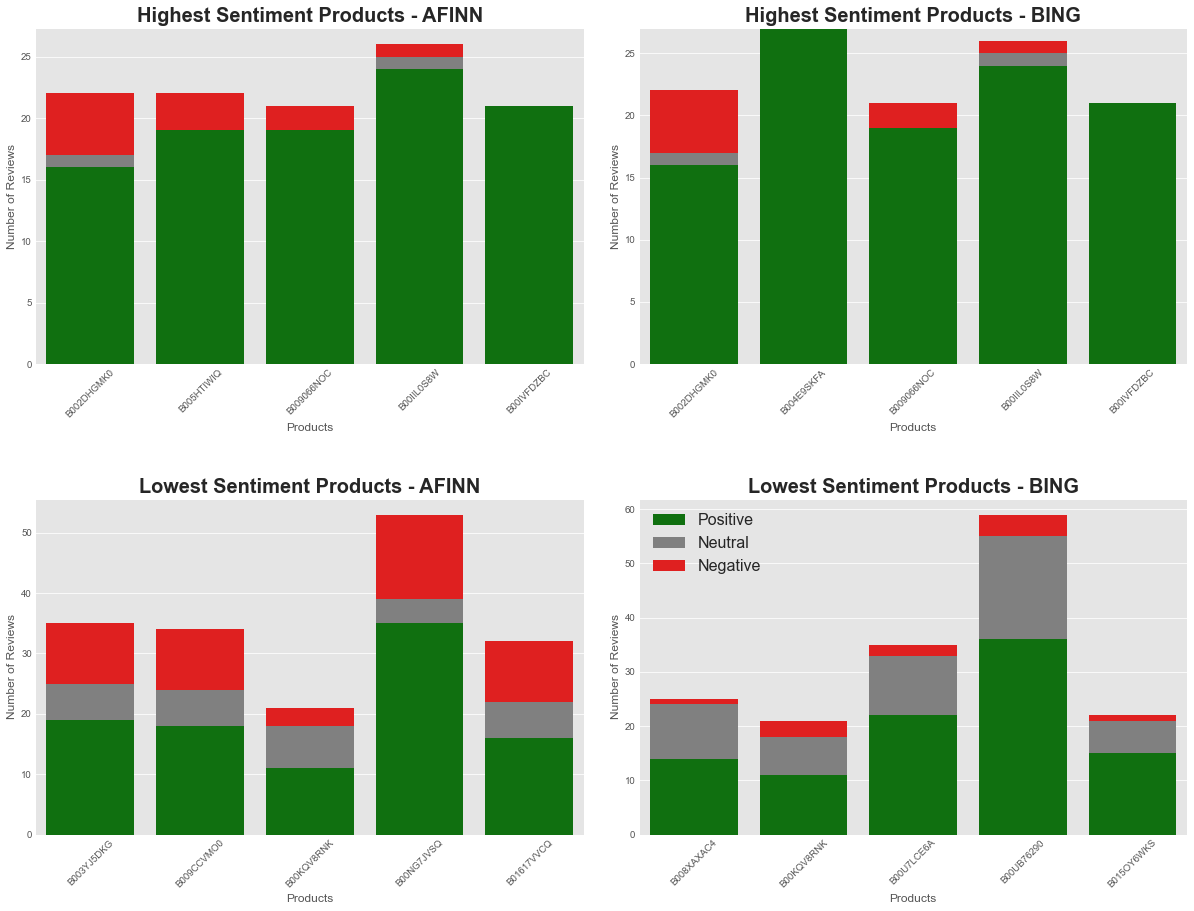

In [29]:
# Highest Sentiments - AFINN
fig = plt.figure(figsize=(20, 14))
fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.4)
plt.style.use('ggplot')

plt.subplot(2,2,1)
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_afinn)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_afinn)].pos, color='green', label='Positive')
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_afinn)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_afinn)].neu, color='grey', bottom=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_afinn)].pos, label='Neutral')
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_afinn)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_afinn)].neg, color='red', bottom=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_afinn)].neu+prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_afinn)].pos, label='Negative')
plt.title('Highest Sentiment Products - AFINN', fontsize=20, fontweight='bold')
plt.xlabel('Products')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)



# Lowest Sentiments - AFINN
plt.subplot(2,2,3)
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_afinn)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_afinn)].pos, color='green', label='Positive')
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_afinn)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_afinn)].neu, color='grey', bottom=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_afinn)].pos, label='Neutral')
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_afinn)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_afinn)].neg, color='red', bottom=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_afinn)].neu+prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_afinn)].pos, label='Negative')
plt.title('Lowest Sentiment Products - AFINN', fontsize=20, fontweight='bold')
plt.xlabel('Products')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)



# Highest Sentiments - BING
plt.subplot(2,2,2)
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_bing)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_bing)].pos, color='green', label='Positive')
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_bing)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_bing)].neu, color='grey', bottom=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_bing)].pos, label='Neutral')
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_bing)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_bing)].neg, color='red', bottom=prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_bing)].neu+prods_reviews_bing[prods_reviews_bing.index.isin(top6_prod_bing)].pos, label='Negative')
plt.title('Highest Sentiment Products - BING', fontsize=20, fontweight='bold')
plt.xlabel('Products')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)


# Lowest Sentiments - BING
plt.subplot(2,2,4)
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_bing)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_bing)].pos, color='green', label='Positive')
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_bing)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_bing)].neu, color='grey', bottom=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_bing)].pos, label='Neutral')
sns.barplot(x=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_bing)].index, y=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_bing)].neg, color='red', bottom=prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_bing)].neu+prods_reviews_bing[prods_reviews_bing.index.isin(low_6_prod_bing)].pos, label='Negative')
plt.title('Lowest Sentiment Products - BING', fontsize=20, fontweight='bold')
plt.xlabel('Products')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(loc='upper left', fontsize = 16)



### <a id='toc7_1_3_'></a>[Tokenization](#toc0_)

**Token and Tokenization**: The process of **breaking a text corpus into smaller units**, typically *words*, *phrases*, or *sentences*. Tokenization is the first step in most natural language processing tasks, as it helps to normalize the text and make it more amenable to further analysis.
- **e.g.** given the sentence "The quick brown fox jumps over the lazy dog", tokenization would break the sentence into a list of individual words: ["The", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"].

**Stemming**: The process of **reducing a word to its base or root form** by removing suffixes and prefixes. The resulting form, called the stem, may not be a real word, but it captures the essential meaning of the original word. It may not always produce meaningful base forms.


- **e.g.**, stemming the word "jumped" would result in the stem "jump", and stemming the word "running" would result in the stem "run". Stemming can help to reduce the number of unique words in a text corpus and make it easier to analyze.


**Lemmatizing**: The process of **reducing a word to its base or dictionary form**, called the lemma, by applying morphological analysis to the word (i.e, involves analyzing the structure of words to determine their base form or lemma). The resulting lemma is a real word that conveys the same meaning as the original word. Lemmatization is a more sophisticated version of stemming that produces more accurate and meaningful lemmas,  but it is also more computationally intensive.

**Stop Words**: Common words that are typically removed from a text corpus before analysis because they do not add much meaning or value to the text. Removing stop words can help to reduce the noise in a text corpus and make it easier to focus on the more meaningful words.
- **e.g.**, of stop words include "the", "a", "an", "and", "in", "on", "at", and so on.


In [30]:
# tokenize text data into words
from nltk.tokenize import word_tokenize

# tokenize text data into words and remove stop words and punctuation marks using NLTK library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

# function to tokenize text data
def tokenize(text):
    # tokenize text data into words
    tokens = word_tokenize(text)
    # remove stop words and punctuation marks
    tokens = [w for w in tokens if w not in stopwords.words('english')]
    tokens = [w for w in tokens if w.isalpha()]
    # lemmatize words
    # lemmatizer = WordNetLemmatizer()
    # tokens = [lemmatizer.lemmatize(w) for w in tokens]
    # stem words
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(w) for w in tokens]
    return tokens

In [31]:
# tokenize text data using tokenize function
soft_data['token_reviewText'] = soft_data['reviewText'].apply(tokenize)

In [32]:
# make each word in token_reviewText as a row   
word_tokens = soft_data.explode('token_reviewText')[['reviewerID', 'reviewerName', 'asin', 'token_reviewText']]

# load afinn and bing lexicon from csv files
afinn = pd.read_csv('/Users/pavansingh/Library/CloudStorage/GoogleDrive-pavansingho23@gmail.com/My Drive/Portfolio/My Github/Recommender-Systems/Data/Lexicons/Afinn.csv', sep=',', header=1)
afinn.columns = ['word', 'score']

# attach sentiment score to each word using AFINN
word_tokens_afinn = pd.merge(word_tokens, afinn, how='left', left_on='token_reviewText', right_on='word')

The merge function combines these two data frames by matching their rows based on the values in a specific column of each dataframe. In this case, the `how` parameter is set to '`left`', which means that all rows from the `word_tokens` dataframe will be included in the merged dataframe, and any matching rows from the `afinn` dataframe will be included as well. If there are rows in `word_tokens` that do not have a match in `afinn`, those rows will still be included in the output, but with missing values in the `word` and `score` columns.



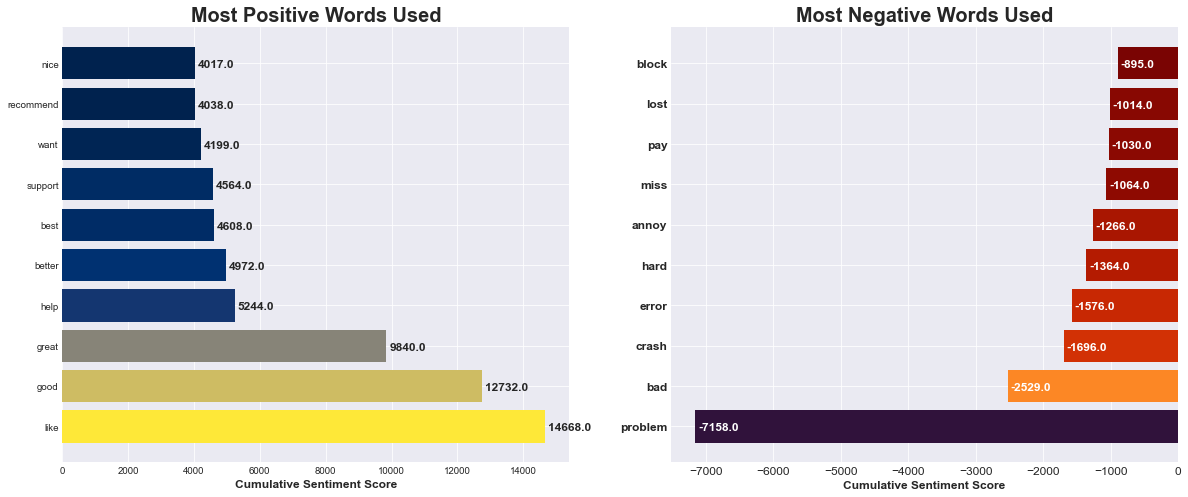

In [33]:
# most positive words used by customers in reviews using AFINN lexicon 
sample1 = word_tokens_afinn.groupby('token_reviewText')['score'].sum().sort_values(ascending=False).head(10)

# most negative words used by customers in reviews using AFINN lexicon 
sample2 = word_tokens_afinn.groupby('token_reviewText')['score'].sum().sort_values(ascending=True).head(10)

# create figure
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize=(20, 8))

# Plot the bar plot -- 1
min = sample1.min()
max = sample1.max()
norm = (sample1 - min) / (max - min) 
colors = cm.cividis(norm) 

plt.subplot(1, 2, 1)
bar = plt.barh(y=sample1.index, width=sample1.values, color=colors)
plt.title("Most Positive Words Used", fontsize=20, fontweight='bold')
plt.xlabel("Cumulative Sentiment Score", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 15), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12)

# Plot the bar plot -- 2
min = sample2.min()
max = sample2.max()
norm = (sample2 - min) / (max - min) 
colors = cm.turbo(norm) 

plt.subplot(1, 2, 2)
bar = plt.barh(y=sample2.index, width=sample2.values, color=colors)
plt.title("Most Negative Words Used", fontsize=20, fontweight='bold')
plt.xlabel("Cumulative Sentiment Score", fontsize=12, fontweight='semibold')
plt.ylabel("", fontsize=12, fontweight='semibold')
plt.xticks(size=12)
plt.yticks(size=12, fontweight='semibold')
for i, value in enumerate(bar.patches):
    height = value.get_width()
    plt.annotate(f'{height}',
                xy=(height, value.get_y()),
                xytext=(3, 15), 
                textcoords="offset points",
                ha='left', va='center',
                weight='semibold',
                fontsize=12, 
                color = 'white')

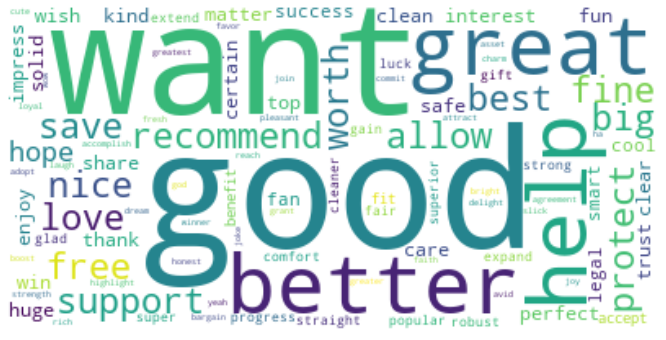

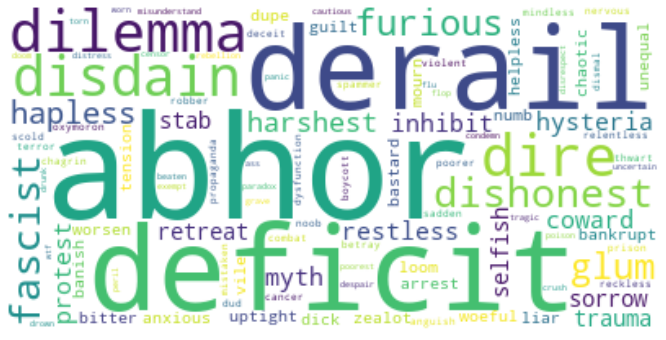

In [34]:
# word cloud for most positive words used by customers in reviews using AFINN lexicon
from wordcloud import WordCloud

# get most common positive words
most_common_positive_words = word_tokens_afinn[word_tokens_afinn['score'] > 0].groupby('token_reviewText')['score'].count().sort_values(ascending=False).head(100).index

# get most common negative words
most_common_negative_words = word_tokens_afinn[word_tokens_afinn['score'] < 0].groupby('token_reviewText')['score'].count().sort_values(ascending=True).head(100).index

# Generate word cloud for most common positive words
fig = plt.figure(figsize=(15, 6))
wordcloud = WordCloud(background_color='white').generate(' '.join(most_common_positive_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate word cloud for most common negative words
fig = plt.figure(figsize=(15,6))
wordcloud = WordCloud(background_color='white').generate(' '.join(most_common_negative_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### <a id='toc7_1_4_'></a>[Feature Generation](#toc0_)

There are a variety of ways to use sentiment analysis to generate additional features for a recommender system based on user reviews. Note that the effectiveness of this technique will vary greatly according to what type of recommender system you are building.  

However, here are some ways we can do this are listed below: 

<br>

1. **Sentiment Score**
    - can use a sentiment analysis algorithm to calculate the sentiment score for each review, which can be used as a feature in your recommender system. The sentiment score can be a value between 0 and 1, where 0 indicates a negative sentiment and 1 indicates a positive sentiment.

<br>

2. **Positive and Negative Reviews**
    - can classify reviews as positive or negative based on the sentiment score. This binary classification can be used as a feature in your recommender system.

<br>

3. **Sentiment-based Rating Adjustment**
    - adjust the ratings given by the users based on the sentiment of their reviews. For example, if a user gave a high rating to a product but the sentiment of their review is negative, you can adjust the rating downwards.

<br>

4. **Sentiment-based Similarity Metric**
    - calculate the similarity between users or items based on their sentiment scores. This can be used as a feature in your collaborative filtering algorithm to identify users or items that have similar sentiment scores.

<br>

5. **Sentiment-based User Profile**
    - You can use sentiment analysis to analyze the sentiment of the user's profile or preferences. This can help you identify users who have a preference for items with positive or negative sentiment and recommend items to them accordingly.




In [35]:
# data set for recommender systems
soft_data[['reviewerID', 'reviewerName', 'asin','new_review', 'overall', 'new_title', 'new_brand', 'description', 'sentiment_afinn', 'sentiment_bing']]

,reviewerID,reviewerName,asin,new_review,overall,new_title,new_brand,description,sentiment_afinn,sentiment_bing
0,A38NELQT98S4H8,WB Halper,0321719816,i ve been using dreamweaver and it s predecess...,4,learn adobe dreamweaver cs5 by video core trai...,peach pit press,['This complete training program from Adobe Pr...,17.0,11
1,A3QJU4FEN8PQSZ,Grimmy,0321719816,the demo is done with the pc version with refe...,4,learn adobe dreamweaver cs5 by video core trai...,peach pit press,['This complete training program from Adobe Pr...,12.0,-6
2,ACJT8MUC0LRF0,D. Fowler,0321719816,if you ve been wanting to learn how to create ...,5,learn adobe dreamweaver cs5 by video core trai...,peach pit press,['This complete training program from Adobe Pr...,47.0,24
3,AYUF7YETYOLNX,Bryan Newman,0321719816,i ve been creating websites with dreamweaver f...,5,learn adobe dreamweaver cs5 by video core trai...,peach pit press,['This complete training program from Adobe Pr...,26.0,18
4,A31ICLWQ9CSHRS,Al Swanson,0321719816,i decided after trying a number of other produ...,5,learn adobe dreamweaver cs5 by video core trai...,peach pit press,['This complete training program from Adobe Pr...,18.0,7
...,...,...,...,...,...,...,...,...,...,...
14098,A1WXG10FJ353K0,M,B005IHT91Q,i had wrote a lengthy review of this version s...,5,autocad 2012 for mac includes 1 year autodesk ...,autodesk,['Design and shape the world around you with A...,2.0,3
14099,A1M85S3L9ROA17,C. Jong,B005IHT91Q,i ve never really like the windows operating s...,4,autocad 2012 for mac includes 1 year autodesk ...,autodesk,['Design and shape the world around you with A...,25.0,16
14100,A7H1LWFBE905R,KWJ,B005IHT91Q,autocad has been the industry standard for 3d ...,5,autocad 2012 for mac includes 1 year autodesk ...,autodesk,['Design and shape the world around you with A...,14.0,15
14101,A225G2TFM76GYX,J. White,B005IHT91Q,autocad 2012 is the reference standard drawing...,4,autocad 2012 for mac includes 1 year autodesk ...,autodesk,['Design and shape the world around you with A...,13.0,7


For our recommender systems, we can consider using a sentiment-based rating adjustment, as we see several cases where the sentiment from a user is negative but the overall rating for the product is high (4+). Similarly, we have several hundred reviews were the rating was low (below 3) and the sentiment was quite high from the review. 

In [36]:
# reviews which have 4 plus stars but negative sentiment using AFINN lexicon
print("High Ratings with Negative Sentiment (AFINN): ", soft_data[(soft_data['overall'] >= 3.5) & (soft_data['sentiment_afinn'] <= -10)].shape)

# reviews which have 4 plus stars but negative sentiment using Bing lexicon
print("High Ratings with Negative Sentiment (BING): ", soft_data[(soft_data['overall'] >= 3.5) & (soft_data['sentiment_bing'] <= -5)].shape)

# reviews which have 3 or less stars but positive sentiment using AFINN lexicon
print("Low Ratings with Positive Sentiment (AFINN): ", soft_data[(soft_data['overall'] <= 3) & (soft_data['sentiment_afinn'] >= 15)].shape)

# reviews which have 3 or less stars but positive sentiment using Bing lexicon
print("Low Ratings with Positive Sentiment (BING): ", soft_data[(soft_data['overall'] <= 3) & (soft_data['sentiment_bing'] >= 10)].shape)

High Ratings with Negative Sentiment (AFINN):  (26, 15)
High Ratings with Negative Sentiment (BING):  (19, 15)
Low Ratings with Positive Sentiment (AFINN):  (458, 15)
Low Ratings with Positive Sentiment (BING):  (664, 15)


***
# <a id='toc8_'></a>[Collaborative Filtering](#toc0_)

Collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). 

> The underlying assumption of the collaborative filtering approach is that if a person $A$ has the same opinion as a person $B$ on an issue, $A$ is more likely to have $B$'s opinion on a different issue $x$ than to have the opinion on $x$ of a person chosen randomly.


We explore two popular methods for collaborative filtering: **non-negative matrix factorization** and **neural collaborative filtering**.

## <a id='toc8_1_'></a>[Non-Negative Matrix Factorisation (NMF)](#toc0_)

Matrix factorization, also called matrix decomposition, takes a matrix and represents it as a product of other (usually two) matrices.
In recommendation systems, matrix factorization is used to **decompose the ratings matrix into the product of two matrices**. This is done in such a way that the known ratings are matched as closely as possible. 

The key feature of matrix factorization for recommendation systems is that while the ratings matrix is incomplete (i.e. some entries are blank), the two matrices the ratings matrix is decomposed into are *complete* (no blank entries). This gives a straightforward way of filling in blank spaces in the original ratings matrix, as we'll see.

**NMF**, non-negative matrix factorization is defined as follows: given an $n\times m$ non-negative matrix $X$, the goal of NMF is to find two non-negative matrices $W$ (an $n \times k$ matrix) and $H$ (a $k \times m$ matrix), where $k \ll n$, $m$, such that $X$ can be approximated as $X \approx WH$.


### <a id='toc8_1_1_'></a>[Process or Methodology](#toc0_)

We outline the steps to take to conduct non-negative matrix factorization below:

1. Preprocess Data: clean and process data to ensure it is in the correct format for NMF. This includes removing missing values, converting data types, and so on.

<br>

2. Create Ratings Matrix: create a ratings matrix from the data. The rows of the ratings matrix correspond to users, and the columns correspond to items. The entries in the ratings matrix are the ratings given by the users to the items.

<br>

3. **Decompose the ratings matrix into the product of two matrices**. This is done in such a way that the known ratings are matched as closely as possible. The key feature of matrix factorization for recommendation systems is that while the ratings matrix is incomplete (i.e. some entries are blank), the two matrices the ratings matrix is decomposed into are *complete* (no blank entries). This gives a straightforward way of filling in blank spaces in the original ratings matrix.
    - can use a suitable implementation in Python such as Scikit-learn or Tensorflow. Choose the number of latent factors ($k$) and the regularization parameters.

<br>

4. **Fill in the blank spaces in the ratings matrix**. This is done by multiplying the two matrices together. The resulting matrix will have the same dimensions as the original ratings matrix, and will contain the predicted ratings for all users and items.

<br>

5. **Use the predicted ratings to make recommendations**. The predicted ratings can be used to make recommendations to users. For example, we can recommend the items with the highest predicted ratings to each user.

<br>

6. **Evaluate the performance of the recommender system**. The performance of the recommender system can be evaluated by comparing the predicted ratings with the actual ratings in the ratings matrix. This can be done using a variety of metrics, such as the root mean squared error (RMSE) and mean average precision (MAP).

<br>

***Note***, that we can **tune the hyperparameters of the recommender system**. The performance of the recommender system can be improved by tuning the hyperparameters of the model. This can be done by using a grid search to find the optimal values for the hyperparameters.

    We try to learn a model that can predict the rating for a given user and item.



In [54]:
# get data in format for matrix factorization
mf_data = soft_data[['reviewerID', 'asin', 'overall']]
mf_data

# get data into ratings matrix format
ratings_matrix = mf_data.pivot_table(index='reviewerID', columns='asin', values='overall')
ratings_matrix

# show cells in ratings matrix without NaN values
ratings_matrix["B01F7RJHIQ"]


reviewerID
A100UD67AHFODS    NaN
A105S56ODHGJEK    NaN
A1075X1Q4M3S78    5.0
A10C5CJK1YKGV0    NaN
A10CRW7XRJBJ2G    NaN
                 ... 
AZD8SMNGQI98O     NaN
AZQGJ5CEAJGXB     NaN
AZW10G02DNJI4     NaN
AZYJE40XW6MFG     NaN
AZZ5ASC403N74     NaN
Name: B01F7RJHIQ, Length: 1826, dtype: float64

In [ ]:

# show ratings matrix as a heatmap
fig = plt.figure(figsize=(15, 6)) 
sns.heatmap(ratings_matrix, cmap='coolwarm', linewidths=0.1, linecolor='white', annot=False)
plt.title("Ratings Matrix", fontsize=20, fontweight='bold')
plt.xlabel("Product ID", fontsize=12, fontweight='semibold')
plt.ylabel("Customer ID", fontsize=12, fontweight='semibold')
plt.show()

We have alot of users and hundreds of products. We saw earlier that users on average rate 6.5 products. This means that we have a lot of missing values in our ratings matrix - sparse matrix.

### NMF with Scikit-Learn

We shall make use of the `NMF` function part of the `decomposition` module in `sklearn`. We shall also explore tweaking some of its  parameters to better generate predicted ratings matrix from the two decomposed  matrices, $W$ and $H$. 

In [45]:
# get R
R = ratings_matrix.values
R

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
from sklearn.decomposition import NMF
import numpy as np

# Specify the number of latent factors
k = 90

# Apply NMF to the ratings matrix
model = NMF(n_components=k, init='random', random_state=12)
W = model.fit_transform(R)
H = model.components_

# Reconstruct the ratings matrix using the factor matrices
R_reconstructed = np.dot(W, H)
R_reconstructed = pd.DataFrame(R_reconstructed)
R_reconstructed.columns = ratings_matrix.columns
R_reconstructed.index = ratings_matrix.index
R_reconstructed

/Users/pavansingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


asin,0321700945,0321719816,0321719824,0763855553,0982697813,1413313701,1413313728,1426296355,1600775411,1615354336,...,B01DEG0SGC,B01E6C5D1S,B01EB06QUM,B01EB06R10,B01F4PYHX6,B01F7RJHIQ,B01FFVDY9M,B01H39M7ME,B01HAP3NUG,B01HAP47PQ
reviewerID,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.014345,0.036137,0.003162,0.015113,0.010198,0.011961,0.004846,0.000141,0.000533,0.022460,...,0.000000,0.000094,0.001223,0.045619,0.004051,0.075437,0.029992,0.000089,0.002832,0.013415
A105S56ODHGJEK,0.605126,0.450803,0.220536,0.002126,0.290137,0.185002,0.549430,0.242789,0.738731,0.175010,...,0.000000,0.000241,0.104728,0.515699,0.335097,0.000000,0.329169,0.000838,0.415070,0.063102
A1075X1Q4M3S78,0.003320,0.000000,0.001828,0.001948,0.000000,0.000000,0.007072,0.014436,0.105284,0.198500,...,0.000000,0.000000,0.005497,0.000000,0.050765,4.860043,0.000000,0.000186,0.019872,0.004868
A10C5CJK1YKGV0,0.444293,0.371305,0.171030,0.013656,0.085657,0.016948,0.092748,0.013147,0.295733,0.071831,...,0.000000,0.000406,0.000139,0.131181,0.064105,0.000006,0.140441,0.000274,0.013717,0.019895
A10CRW7XRJBJ2G,0.000260,0.001625,0.001249,0.000909,0.001301,0.010552,0.023330,0.000102,0.021122,0.004012,...,0.000000,0.001081,0.001693,0.000000,0.000485,0.000000,0.000308,0.000064,0.001239,0.000965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZD8SMNGQI98O,0.014750,0.094115,0.008971,0.000062,0.407777,0.408443,0.010903,0.148823,0.015536,0.018637,...,0.020527,0.029537,0.518083,0.130210,0.664514,0.000442,0.136875,0.024346,0.569986,0.213051
AZQGJ5CEAJGXB,0.023002,0.018517,0.025461,0.027713,0.019168,0.052315,0.093177,0.015432,0.029249,0.000233,...,0.000395,0.010738,0.145480,0.027227,0.114939,0.000000,0.161531,0.000475,0.207970,0.034984
AZW10G02DNJI4,0.032836,0.103571,0.111337,0.000000,0.110956,0.000000,0.036958,0.000592,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.014020,0.007671,0.000000,0.000000,0.000000,0.000000,0.187261


In [104]:
# Generate recommendations for a user

def nmf_recommender(user, latent_fac, k, R):
    # Specify the number of latent factors
    latent_fac = latent_fac
    
    # Apply NMF to the ratings matrix
    model = NMF(n_components=latent_fac, init='random', random_state=12)
    W = model.fit_transform(R)
    H = model.components_

    # Reconstruct the ratings matrix using the factor matrices
    R_reconstructed = np.dot(W, H)
    R_reconstructed = pd.DataFrame(R_reconstructed)
    R_reconstructed.columns = ratings_matrix.columns
    R_reconstructed.index = ratings_matrix.index
    
    # Get User
    user = user

    # Ratings Predicted for user
    R = R_reconstructed.loc[user, :].sort_values(ascending=False)

    # attach product title
    R = pd.DataFrame(R)
    R = R.merge(soft_data[['asin', 'new_title']], on='asin', how='left').drop_duplicates(keep='first')

    # remove products already rated by user
    R = R[~R.asin.isin(soft_data.loc[soft_data.reviewerID == user,'asin'])]
    
    # Return Recommendations for user
    return R


We generated a funcion which uses scikit-learn's NMF algorithm to generate recommendations for a user. The function takes a user id, number of latent factors, number of recommendations, and the ratings matrix as inputs. The function returns a dataframe of recommendations for the user. The resulting recommendations also do not include reviewed products.

In [105]:
# test function
nmf_recommender(user = 'A100UD67AHFODS', latent_fac = 2, k= 10, R = R)

,asin,A100UD67AHFODS,new_title
0,B00EZPXYP4,6.956697e-01,norton 360 21 0 en 1u 3lic mm
98,B00F8K9MZQ,5.096162e-01,turbotax deluxe fed efile state 2013 old version
172,B015724OVG,4.201746e-01,norton security deluxe ndash 5 devices ndash 1...
236,B005S4Y13K,3.689713e-01,turbotax deluxe federal e file state 2011 for ...
295,B00EZQYC8G,3.655282e-01,norton internet security 2014 1 year 3 license...
...,...,...,...
11946,B0012RAVRC,8.908098e-05,mac os x leopard 10 5 10 51
11947,B0016PT3BK,5.141275e-05,eblaster 6
11948,B0013WO6QS,2.983188e-05,norton 360 version 2 0 premier edition old ver...
11949,B00005LBVS,5.696175e-71,the learning company oregon trail 5th edition


In [78]:
# get product reviewed by user A100UD67AHFODS
soft_data[soft_data['reviewerID'] == 'A100UD67AHFODS'][['asin', 'new_title', 'overall']]

,asin,new_title,overall
7768,B005S4Y65I,turbotax premier federal e file state 2011 for...,5
8727,B009CCVMO0,turbotax premier federal e file state 2012 old...,5
9092,B00BR082FW,ccleaner professional system optimization tool...,5
10251,B00F8K9KZS,turbotax premier fed efile state 2013 old version,5
13611,B01617VQJ4,intuit turbotax premier 2015 federal state tax...,4


### NMF From Scratch

Now once we have our ratings matrix, where each row is a reviwer/user and each column is an item/product, we can move onto the next step of decomposing the matrix into the product of two matrices. This is done in such a way that the known ratings are matched as closely as possible. We can achiee this using the NMF algorithm in Scikit-Learn or as we will see, from scratch using the fundamentals. What we do is we choose the number of latent factors ($k$) and the regularization parameters. We initisalise the factor matrices $W$ and $H$ with random values. We then update the factor matrices using the following equations until convergence:

$$H = \frac{H*(W^T \times R)}{W^T \times W \times H + \beta}$$ 

<br>

$$W= \frac{ W *( R \times H^T)}{W \times H \times H^T + \beta}$$



Note that here, `*` denotes element-wise multiplication, and $\beta$ is the regularization parameter, $\times$ denotes matrix multiplication, and $R$ is the ratings matrix. The expressions $W^T \times W \times H$ and $W \times H \times H^T$ represents the regularization terms, which encourages the factor matrix $H$ and $W$, respectively, to be as small as possible while still accurately modeling the ratings matrix. The parameter $\beta$ is a regularization hyperparameter that controls the strength of the regularization. By iteratively updating the factor matrices $W$ and $H$ according to these equations, we can minimize the objective function of NMF and learn the latent factors that best explain the observed user-item interactions.




In NMF, convergence is usually determined by monitoring the error or loss function of the factorization. The goal is to minimize the difference between the original ratings matrix R and the product of the factor matrices W and H. One common error or loss function used in NMF is the Frobenius norm, which is defined as the square root of the sum of the squared differences between the original matrix and its approximation. 

The **Frobenius norm** is given by: F = $\sqrt{\sum_{i,j} (R_{ij} - WH_{ij})^2}$ where $R_{ij}$ is the element in the original ratings matrix at row $i$ and column $j$, and $WH_{ij}$ is the element in the product of the factor matrices at row $i$ and column $j$. The Frobenius norm is minimized when the product of the factor matrices W and H is as close as possible to the original ratings matrix R. In practice, the algorithm typically stops when the change in the Frobenius norm falls below a certain threshold, indicating that the approximation has converged to a stable solution.

Alternatively, the algorithm can be terminated after a fixed number of iterations if the change in the Frobenius norm is not sufficiently small


In [ ]:
import numpy as np

# set the number of latent factors
latent_fac = 1000

# initialize the factor matrices W and H randomly
W = np.random.rand(R.shape[0], latent_fac)
H = np.random.rand(latent_fac, R.shape[1])

# set the number of iterations and the threshold for convergence
num_iterations = 50
tolerance = 1e-4

# Set the hyperparameter beta for regularization
beta = 0.1

# define the error function (Frobenius norm)
def error(R, W, H):
    return np.linalg.norm(R - np.dot(W, H), 'fro')

# iterate until convergence
for i in range(num_iterations):
    # update H
    H *= np.dot(W.T, R) / (np.dot(W.T, W).dot(H) + beta)
    # update W
    W *= np.dot(R, H.T) / (W.dot(np.dot(H, H.T)) + beta)
    # calculate the error
    err = error(R, W, H)
    # check for convergence
    if err < tolerance:
        break
    # print the error every 10 iterations
    if i % 10 == 0:
        print("Iteration {0}: error = {1}".format(i, err))
        
# print the final error and factor matrices
print("Final error = {0}".format(error(R, W, H)))
print("W =\n", W)
print("H =\n", H)

In the above code, we first initialize the factor matrices $W$ and $$ randomly, set the number of iterations and the threshold for convergence, and define the error function (Frobenius norm). We then iterate until convergence, updating the factor matrices $W$ and $H$ using the NMF update rules, calculating the error at each iteration, and checking for convergence using the tolerance threshold. Finally, we print the final error and factor matrices $W$ and $H$. The error is expected to decrease with each iteration and converge to a minimum value, while the factor matrices are expected to capture the latent factors in the ratings data.

The results are not promising. Convergence is also very slow. Lets try change things. 

1. We **change the the optimisation algorithm**. 
    - SSE (sum of squared errors) is also a common optimization metric used in non-negative matrix factorization. The goal of SSE optimization is to minimize the sum of squared errors between the original input matrix and the product of the factor matrices. This can be achieved using different optimization algorithms such as **gradient descent**, alternating least squares, and others.
    - To optimize the SSE, we can use **gradient descent** to minimize the difference between the predicted ratings and the actual ratings. This involves computing the gradient of the SSE with respect to the factor matrices, and updating the matrices in the direction of the negative gradient. This process is repeated until convergence.
    - we previously used ***multiplicative update rule***, which is an iterative optimization algorithm that seeks to minimize the reconstruction error between the input matrix and the product of the factor matrices

<br>

2. **Initialize the factor matrices with good starting values**.
    -  This can help to avoid getting stuck in a local minimum and speed up the convergence process. Good initial values can be obtained from random or semi-random initialization, or from pre-training with a related dataset.
 


### Using Gradient Descent

We use the optimization algorithm gradient descent with the optimization metric SSE. We seek to minimize the SSE between  original ratings matrix and the product of the factor matrices. 


***Note*** we also look at better initializing the factor matrices with better starting values. 



In [ ]:
# set the number of latent factors
latent_fac = 100

# initialize the factor matrices W and H randomly between 1 and 5
W = np.random.rand(R.shape[0], latent_fac) * 4 + 1
H = np.random.rand(latent_fac, R.shape[1]) * 4 + 1

# define learning rate and number of iterations
learning_rate = 0.001
num_iterations = 1000

# compute initial SSE
R_pred = W @ H
sse = np.sum((R - R_pred)**2)

# perform gradient descent
for i in range(num_iterations):
    
    # compute gradients
    dW = -2 * (R - R_pred) @ H.T + 2 * W @ (H @ H.T)
    dH = -2 * W.T @ (R - R_pred) + 2 * (W.T @ W) @ H
    
    # update factor matrices
    W -= learning_rate * dW
    H -= learning_rate * dH
    
    # recompute predicted ratings and SSE
    R_pred = W @ H
    sse = np.sum((R - R_pred)**2)

    # check for convergence
    if sse < tolerance:
        break

    # print the error every 10 iterations
    if i % 10 == 0:
        print("Iteration {0}: SSE = {1}".format(i, sse))
        
# print the final error and factor matrices
print("Final SSE = {0}".format(sse))
print("W =\n", W)
print("H =\n", H)


In [ ]:
# calculate predicted ratings matrix

In [ ]:
# generate function for recommendations

### <a id='toc8_1_2_'></a>[Model Evaluation](#toc0_)

## <a id='toc8_2_'></a>[Neural Collaborative Filtering (NCF)](#toc0_)


### <a id='toc8_2_1_'></a>[Process or Methodology](#toc0_)

### <a id='toc8_2_2_'></a>[Model Evaluation](#toc0_)

***
# <a id='toc9_'></a>[Content Based Filtering](#toc0_)

CBFs or content based filtering  recommender systems **use the content or attributes of items**, such as genre, director, actor, or tags, to recommend items that are similar to those the user has previously interacted with. 

### <a id='toc9_1_1_'></a>[Metadata](#toc0_)
The metadata for our content based filtering recommender system will include:

- new_review: cleaned and preprocessed review text from users
- new_title: cleaned and preprocessed name of the product reviewed by user
- new_brand: cleaned and preprocessed brand name for product reviewed
- description: cleaned and preprocessed description of the product reviewed 

### <a id='toc9_1_2_'></a>[Methodology](#toc0_)
Since we have many users who have purchased (reviewed) many products. We will need to geenrate a contnet based filtering system that:

<br>

1. **calculates the similarity scores** between the features of different products. 
    - e.g., you could compute the cosine similarity between the vectorized product titles or descriptions. This would give you a similarity score between 0 and 1, where 1 indicates that two products are very similar and 0 indicates that they are dissimilar.

<br>

2. then we **use this similarity score to recommend products** to users who have shown a preference for similar products in the past. Note, that in the recommended list the products should not have been already reviwed by this user.
    - e.g. you could recommend the top-k most similar products (not purchased by user)
    - filter out products that the user has already purchased or interacted with in the past. You want to recommend products that the user has not yet

<br>

#### <a id='toc9_1_2_1_'></a>[Review Text as Metadata](#toc0_)

Although it may not be easy to reason why one would include review text as metadata for our content based filtering system, it does provide some substantial benefits. Review text can provide a lot of valuable information about a product, such as its features, benefits, drawbacks, and overall quality. This information can be used to identify similar products that are likely to appeal to the same users.

To do this, I shall **combine the reviews for each product into a single record**, so that you have one record per product that contains all of the relevant information about that product. This will make it easier to calculate similarity scores between products and generate recommendations based on those scores.

> we combine text reviews for each product into a single column. So a row represents a product with all its metadata.

#### <a id='toc9_1_2_2_'></a>[Sentiments as Metadata](#toc0_)

We can also make use of our sentiment analysis, by incorporating overall sentiment for a product, which can be a useful feature to include in our content-based filtering system. 

To calculate the overall sentiment for a product, we shall make use of our sentiment scores that we have obtained for each review in `soft_data`. We shall then aggregate the sentiment scores to get an overall sentiment score for the product. This score could then be used as an additional feature in your similarity calculation between products. 

#### <a id='toc9_1_2_3_'></a>[Summary of Steps](#toc0_)
Ultimately, our new dataframe after processing the metadata, will be such that each row represents a unique product, with all of the relevant metadata, concatenated review text, and an overall sentiment score for that product

## <a id='toc9_2_'></a>[Using Sentiment with Text Metadata](#toc0_)

In [213]:

cbf_data = soft_data.copy()[['reviewerID', 'asin','new_review', 'overall', 'new_title', 'new_desc', 'new_brand', 'sentiment_bing']]
cbf_data.head(3)

,reviewerID,asin,new_review,overall,new_title,new_desc,new_brand,sentiment_bing
0,A38NELQT98S4H8,0321719816,i ve been using dreamweaver and it s predecess...,4,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press,11
1,A3QJU4FEN8PQSZ,0321719816,the demo is done with the pc version with refe...,4,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press,-6
2,ACJT8MUC0LRF0,0321719816,if you ve been wanting to learn how to create ...,5,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press,24


In [217]:
# create a new column for CBF (title + description + brand + review)
cbf_data['meta'] = cbf_data['new_title'] + ' ' + cbf_data['new_desc'] + ' ' + cbf_data['new_brand'] + ' ' + cbf_data['new_review']
cbf_data.head(3)

,reviewerID,asin,new_review,overall,new_title,new_desc,new_brand,sentiment_bing,content,meta
0,A38NELQT98S4H8,0321719816,i ve been using dreamweaver and it s predecess...,4,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press,11,learn adobe dreamweaver cs5 by video core trai...,learn adobe dreamweaver cs5 by video core trai...
1,A3QJU4FEN8PQSZ,0321719816,the demo is done with the pc version with refe...,4,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press,-6,learn adobe dreamweaver cs5 by video core trai...,learn adobe dreamweaver cs5 by video core trai...
2,ACJT8MUC0LRF0,0321719816,if you ve been wanting to learn how to create ...,5,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press,24,learn adobe dreamweaver cs5 by video core trai...,learn adobe dreamweaver cs5 by video core trai...


Now we have all our text metadata joined in one column separated by spaces. Next we move onto getting our aggregated sentiment for each product. We do this by simply getting the average sentiment for each product. We shall attach this in column '`agg_sentiment`' in `cbf_data` dataframe.

In [221]:
# new column with average sentiment score for each product
cbf_data['avg_sentiment'] = cbf_data.groupby('asin')['sentiment_bing'].transform('mean')
cbf_data.head(3)

,reviewerID,asin,new_review,overall,new_title,new_desc,new_brand,sentiment_bing,content,meta,avg_sentiment
0,A38NELQT98S4H8,0321719816,i ve been using dreamweaver and it s predecess...,4,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press,11,learn adobe dreamweaver cs5 by video core trai...,learn adobe dreamweaver cs5 by video core trai...,11.071429
1,A3QJU4FEN8PQSZ,0321719816,the demo is done with the pc version with refe...,4,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press,-6,learn adobe dreamweaver cs5 by video core trai...,learn adobe dreamweaver cs5 by video core trai...,11.071429
2,ACJT8MUC0LRF0,0321719816,if you ve been wanting to learn how to create ...,5,learn adobe dreamweaver cs5 by video core trai...,this complete training program from adobe pres...,peach pit press,24,learn adobe dreamweaver cs5 by video core trai...,learn adobe dreamweaver cs5 by video core trai...,11.071429


Now we can look at reducing our data frame from a review per row to a product per row. This is our aim, as it makes calculating the simialrity between products a lot more straightforward. 

In [231]:
# get dataframe with unique products
unique_products = cbf_data[['asin', 'meta', 'avg_sentiment']].drop_duplicates(subset=['asin'], keep='first')
display(unique_products.head(5))
print("Shape of new dataframe:", unique_products.shape)

,asin,meta,avg_sentiment
0,0321719816,learn adobe dreamweaver cs5 by video core trai...,11.071429
14,0321700945,learn adobe photoshop lightroom 3 by video thi...,7.750000
22,0321719824,learn adobe flash professional cs5 by video co...,11.222222
31,0763855553,microsoft office 365 home 1 year subscription ...,7.194444
67,0982697813,niv glo premium dvd multi device glo features ...,17.666667


Shape of new dataframe: (802, 3)


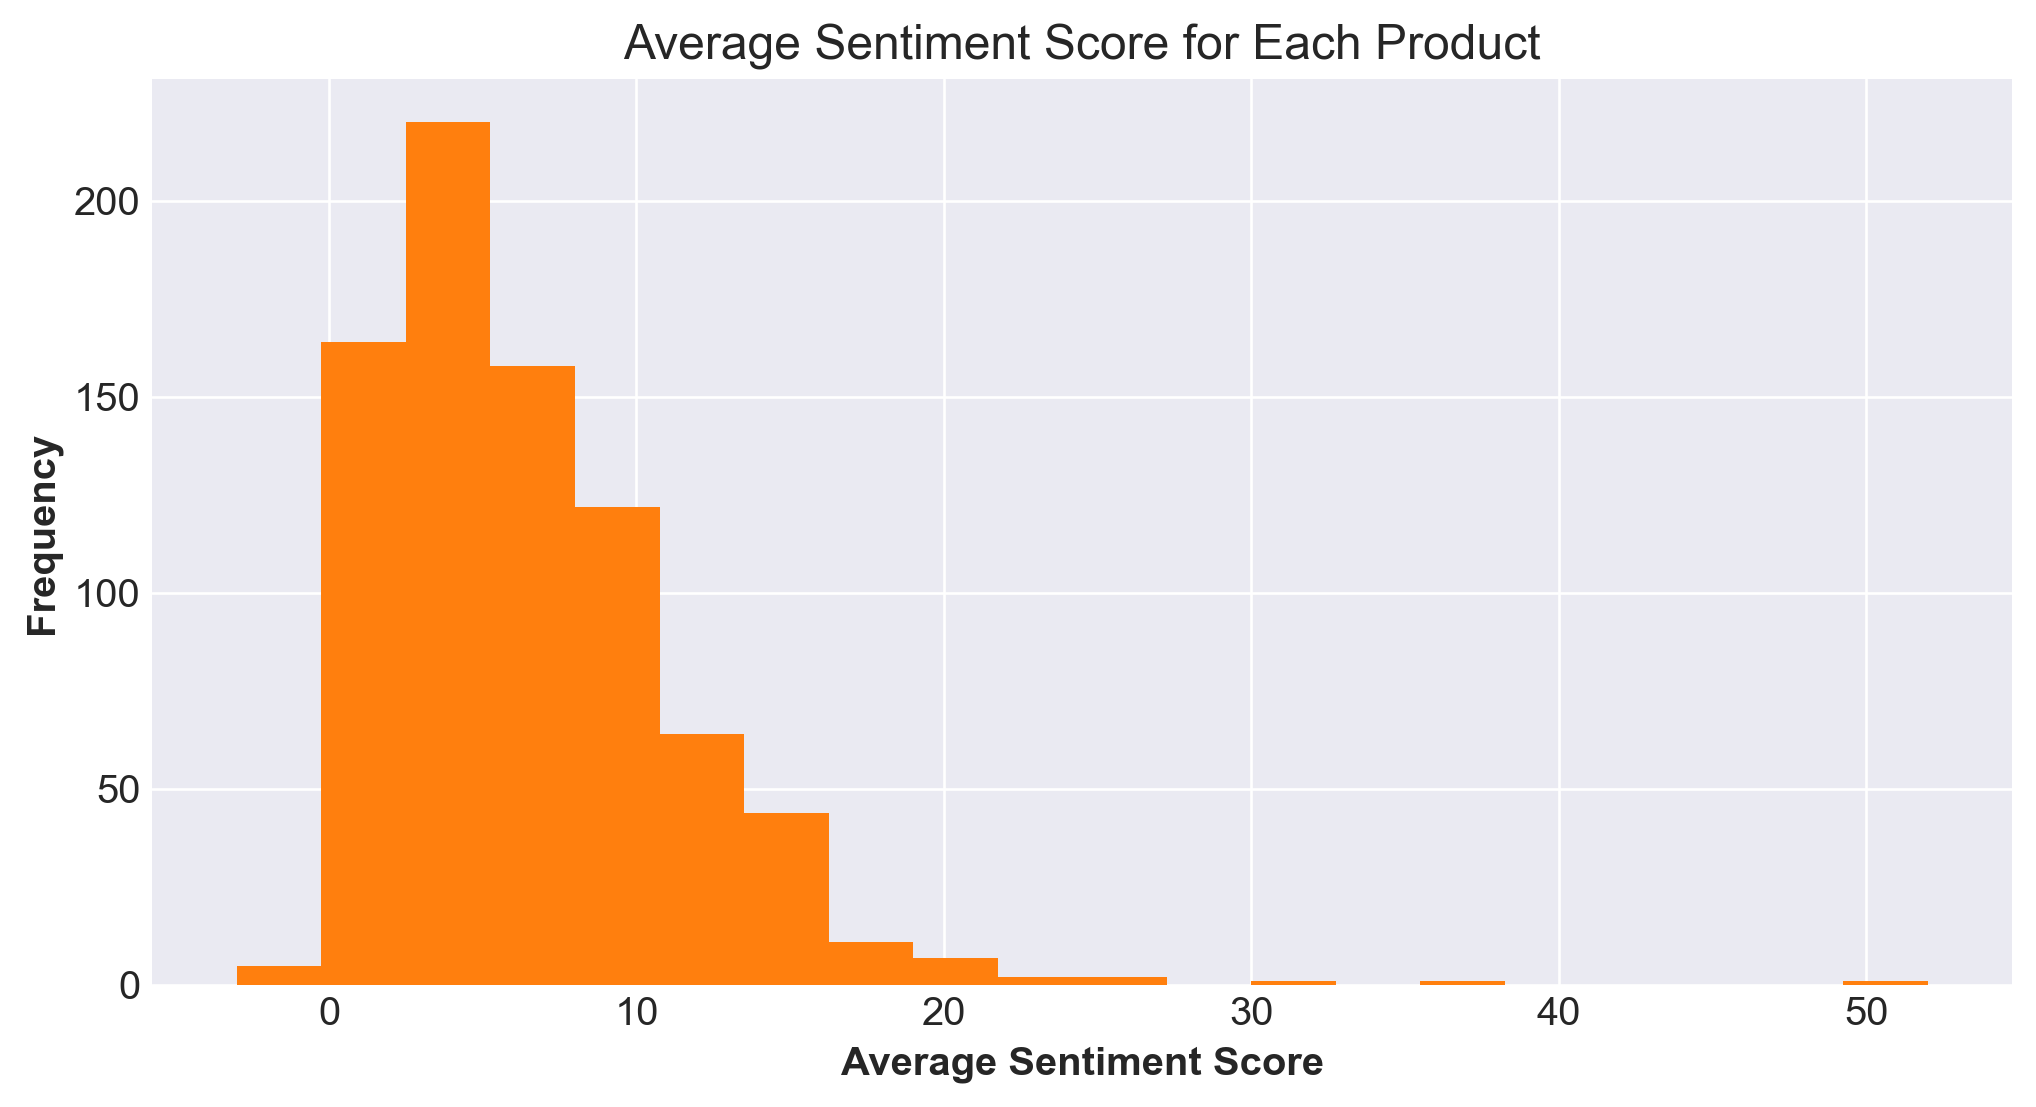

In [393]:
# Average Sentiment Score for Each Product
fig = plt.figure(num=None, dpi=240, facecolor='w', edgecolor='k')
unique_products.avg_sentiment.plot(kind='hist', bins=20, figsize=(10, 5), title='Average Sentiment Score for Each Product', color='#ff7f0e')
plt.xlabel('Average Sentiment Score', fontsize=12, fontweight='semibold')
plt.ylabel('Frequency', fontsize=12, fontweight='semibold')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

The next steps are that we use the `CountVectorizer()`. This will generate our DTM. 
- `CountVectorizer` class from the `sklearn.feature_extraction.text` module, which is a tool for transforming a collection of text documents into a numerical representation.

- The `CountVectorizer` class is an implementation of a bag-of-words model.

In [233]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(unique_products['meta'])

# shape 
print("Shape of DTM:", count_matrix.shape)

Shape of DTM: (802, 15327)


So we have 802 products (documents) and 15 327 words (vocabulary). We can now take our DTM and concatenate it with the numerical feature - sentiment avergae - to ceate a feature representation for each product that combines both numerical and text data. 

In [344]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

# text features
text_fxs = count_matrix.toarray()
print("Shape of text features:", text_fxs.shape)

# numerical features (scaled)
num_fxs = unique_products[['asin', 'avg_sentiment']]
num_fxs = num_fxs.set_index(['asin'], drop=True)
scaler = StandardScaler()
scaler.fit(num_fxs)
num_fxs = scaler.transform(num_fxs)
print("Shape of Numerical Data:", num_fxs.shape)


Shape of text features: (802, 15327)
Shape of Numerical Data: (802, 1)


In [345]:
# combine text and numerical features
all_fxs = np.hstack((num_fxs, text_fxs))
print("Shape of Stacked Array:", all_fxs.shape)

Shape of Stacked Array: (802, 15328)


So we combined our numerical and text features into an array. **The resulting `all_fxs` array is a 2D array with the same number of rows as the unique products dataframe (*number of products*) and a number of columns equal to the number of numerical features plus the number words (*vocabulary in text data*).**
> Each row represents a product, and each column represents a feature

We can use this array as input to similarity metric to make recommendations based on both numerical and text metadata.


    Now all we have to do is apply and calculate the similarity scores between products. We shall be using cosine similarity.  

In [346]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

# calculate cosine sim and get similarity matrix
cbf_sim_mat = cosine_similarity(all_fxs, all_fxs)

# lets look at similarity matrix
np.fill_diagonal(cbf_sim_mat,0) # make diagonal elements 0
cbf_sim_mat = pd.DataFrame(cbf_sim_mat)
cbf_sim_mat.index = unique_products.asin
cbf_sim_mat.columns = unique_products.asin
display(cbf_sim_mat.head(10))

asin,0321719816,0321700945,0321719824,0763855553,0982697813,1413313701,1413313728,1426296355,1600775411,1615354336,...,B0014A2LJ8,B0014A0UDC,B0015CA9VW,B0016PT3BK,B0016XAKZK,B00170IFYU,B0017U9Q2U,B0017XHKYI,B0017XHD40,B005IHT91Q
asin,,,,,,,,,,,,,,,,,,,,,
0321719816,0.000000,0.668960,0.638013,0.080870,0.110836,0.252599,0.062119,0.043765,0.073505,0.096819,...,0.091320,0.154705,0.122814,0.030356,0.039170,0.037533,0.170635,0.029858,0.183810,0.091639
0321700945,0.668960,0.000000,0.598064,0.079165,0.122963,0.219891,0.078357,0.097588,0.131176,0.099624,...,0.160563,0.185821,0.164694,0.007307,0.071553,0.094615,0.201598,0.021409,0.217370,0.125734
0321719824,0.638013,0.598064,0.000000,0.069593,0.117274,0.212198,0.111700,0.042772,0.138116,0.077028,...,0.056768,0.124326,0.117563,0.008134,0.051469,0.133613,0.119597,0.028412,0.179080,0.073975
0763855553,0.080870,0.079165,0.069593,0.000000,0.118619,0.025452,0.020670,0.015019,0.019517,0.068285,...,0.352058,0.191758,0.192330,0.055464,0.043942,0.022331,0.329976,0.009437,0.126530,0.297655
0982697813,0.110836,0.122963,0.117274,0.118619,0.000000,0.134982,0.112235,0.106368,0.120433,0.217582,...,0.078193,0.049914,0.223171,0.032205,0.111104,0.087544,0.051607,0.043758,0.112146,0.124257
1413313701,0.252599,0.219891,0.212198,0.025452,0.134982,0.000000,0.275723,0.026123,0.079013,0.109918,...,0.067555,0.097129,0.139947,0.055433,0.066389,0.021511,0.091027,0.032300,0.121344,0.089024
1413313728,0.062119,0.078357,0.111700,0.020670,0.112235,0.275723,0.000000,0.069749,0.079837,0.082750,...,0.025252,0.030201,0.100510,0.018522,0.141966,0.046010,0.080295,0.076877,0.071297,0.032150
1426296355,0.043765,0.097588,0.042772,0.015019,0.106368,0.026123,0.069749,0.000000,0.061425,0.130075,...,0.051001,0.106966,0.061524,0.018165,0.029984,0.025824,0.107597,0.036025,0.076824,0.037694
1600775411,0.073505,0.131176,0.138116,0.019517,0.120433,0.079013,0.079837,0.061425,0.000000,0.105844,...,0.036239,0.096177,0.150621,0.017249,0.032481,0.084687,0.035855,0.044525,0.128305,0.065008


Now to generate user recommendations need to consider two things. 

1. We need to recommend products which the user has not reviewed (interacted with)

2. We need to recommend products that are similar to the products that the user has reviewed

Now to achieve these we can (1) filter our results to return only product recommnedations for products the user has not reviewed and (2) generate a personalised reocmmendation by looking at the simialrities between products and each of the products that the user has reviewed before. 

Specifically, for (2), we want to calculate the similarity scores between each reviewed product and all the other products, using the content-based filtering approach. Then, for each of the reviewed products, we will generate a list of the top recommended products based on their similarity scores. Finally, we combine these lists and select the top 10 products based on their overall similarity scores.

In [347]:
# get products reviewed by a user
user_products = cbf_data[cbf_data['reviewerID'] == 'A38NELQT98S4H8']['asin']


# similarity with all products
user_sim_mat = cbf_sim_mat.loc[user_products, ]

# create a new dataframe to store the similarity scores
sim_scores = pd.DataFrame(columns=['asin', 'sim_score'])

for i, product in enumerate(user_products):
    new_scores = pd.DataFrame({'asin': user_sim_mat.loc[product,:].sort_values(ascending=False).head(15).index,
                                'sim_score': user_sim_mat.loc[product,:].sort_values(ascending=False).head(15).values})
    sim_scores = pd.concat([sim_scores, new_scores])

# get unique products from sim_scores, take the highest score for each product
sim_scores = sim_scores.groupby('asin')['sim_score'].max().reset_index()

# get the top 10 products, sort by similarity score
sim_scores = sim_scores.sort_values(by='sim_score', ascending=False)

# filter out products already rated by user
sim_scores = sim_scores[~sim_scores['asin'].isin(user_products.values)]
sim_scores.head(10)

# get product title and brand for the top 10 products
top_10 = soft_data[soft_data.asin.isin(sim_scores.asin.values)][['asin', 'new_title', 'new_brand']].drop_duplicates(subset=['asin'], keep='first')
top_10

,asin,new_title,new_brand
14,0321700945,learn adobe photoshop lightroom 3 by video,peach pit press
22,0321719824,learn adobe flash professional cs5 by video co...,peach pit press
746,B00005LBVS,the learning company oregon trail 5th edition,the learning company
962,B00006FI0N,norton internet security 2003,symantec
1939,B000BAV2FG,norton antivirus 2006 old version,symantec
...,...,...,...
13855,B01AC3ZA7C,corel videostudio pro x9 old version,corel
13886,B01CS8RSIS,cyberlink powerdvd 16 ultra,cyberlink
14035,B01HAP3NUG,pinnacle studio 20 plus old version,pinnacle systems
14049,B01HAP47PQ,pinnacle studio 20 ultimate old version,pinnacle systems


So now we have generated a content based filtering apporach recommendation for user `A38NELQT98S4H8`. Now lets geernalise these workings and create a function for which we can supply any user and get a top 10 recommendation. 

In [364]:
# generate function to recommend products to a user
def cbf_recommender(user, k, sim_mat):
    
    # get user name from user id
    user_name = soft_data[soft_data['reviewerID'] == user]['reviewerName'].values[0]
    
    # get products reviewed by a user
    user_products = cbf_data[cbf_data['reviewerID'] == user]['asin']

    # similarity with all products
    user_sim_mat = sim_mat.loc[user_products, ]

    # Get all similarity scores for the products rated by the user
    sim_scores = pd.DataFrame(columns=['asin', 'sim_score'])
    for i, product in enumerate(user_products):
        new_scores = pd.DataFrame({'asin': user_sim_mat.loc[product,:].sort_values(ascending=False).index,
                                   'sim_score': user_sim_mat.loc[product,:].sort_values(ascending=False).values})
        sim_scores = pd.concat([sim_scores, new_scores])

    # get unique products from sim_scores (take the highest score for each product)
    sim_scores = sim_scores.groupby('asin')['sim_score'].max().reset_index()

    # get the top products, sort by similarity score
    sim_scores = sim_scores.sort_values(by='sim_score', ascending=False)

    # filter out products already rated by user
    sim_scores = sim_scores[~sim_scores['asin'].isin(user_products.values)]

    # get product title and brand for the top k products
    top_k = soft_data[soft_data.asin.isin(sim_scores.asin.values)][['asin', 'new_title', 'new_brand']].drop_duplicates(subset=['asin'], keep='first').head(k)

    
    # return top k products
    return print("The Recommended Software Products for", user_name,
                 "using CBF Model are: \n \n", top_k, "\n")

In [368]:
# test function
cbf_recommender(user = 'A3QJU4FEN8PQSZ', k = 5, sim_mat=cbf_sim_mat)

# test function
cbf_recommender(user = 'A1F1A0QQP2XVH5', k = 10, sim_mat=cbf_sim_mat)

The Recommended Software Products for Grimmy using CBF Model are: 
 
           asin                                          new_title  \
14  0321700945         learn adobe photoshop lightroom 3 by video   
31  0763855553  microsoft office 365 home 1 year subscription ...   
67  0982697813                   niv glo premium dvd multi device   
76  1413313701            quicken willmaker plus 2011 old version   
92  1413313728        quicken legal business pro 2011 old version   

            new_brand  
14    peach pit press  
31          microsoft  
67  immersion digital  
76               nolo  
92               nolo   

The Recommended Software Products for Mark B using CBF Model are: 
 
            asin                                          new_title  \
0    0321719816  learn adobe dreamweaver cs5 by video core trai...   
14   0321700945         learn adobe photoshop lightroom 3 by video   
22   0321719824  learn adobe flash professional cs5 by video co...   
31   0763855553  mi

## <a id='toc9_3_'></a>[Using Text Metadata Alone](#toc0_)

This would entail a very similar process as the before CBF approach. THe only difference is that we are not including the generated sentiment scores for each product. 

> we do not concatenate our DTM with numerical feature. We simply use DTM to calculate similarity.

In [375]:
# take text features
print("Shape of Text Metadata:", text_fxs.shape)

# cosine similarity matrix
cbf_sim_mat2 = cosine_similarity(text_fxs, text_fxs)
np.fill_diagonal(cbf_sim_mat2,0) # make diagonal elements 0
cbf_sim_mat2 = pd.DataFrame(cbf_sim_mat2)
cbf_sim_mat2.index = unique_products.asin
cbf_sim_mat2.columns = unique_products.asin
display(cbf_sim_mat2.head(10))

Shape of Text Metadata: (802, 15327)


asin,0321719816,0321700945,0321719824,0763855553,0982697813,1413313701,1413313728,1426296355,1600775411,1615354336,...,B0014A2LJ8,B0014A0UDC,B0015CA9VW,B0016PT3BK,B0016XAKZK,B00170IFYU,B0017U9Q2U,B0017XHKYI,B0017XHD40,B005IHT91Q
asin,,,,,,,,,,,,,,,,,,,,,
0321719816,0.000000,0.669000,0.637829,0.080786,0.109597,0.252675,0.061736,0.043558,0.073182,0.096007,...,0.091457,0.155456,0.122642,0.034579,0.038210,0.039081,0.171159,0.027914,0.183465,0.091414
0321700945,0.669000,0.000000,0.598037,0.079133,0.122691,0.219894,0.078240,0.097524,0.131081,0.099401,...,0.160602,0.186084,0.164636,0.008602,0.071291,0.095222,0.201768,0.020833,0.217269,0.125662
0321719824,0.637829,0.598037,0.000000,0.069522,0.116389,0.212229,0.111427,0.042615,0.137890,0.076412,...,0.056856,0.124873,0.117425,0.011137,0.050766,0.134946,0.119966,0.026972,0.178813,0.073797
0763855553,0.080786,0.079133,0.069522,0.000000,0.118563,0.025450,0.020608,0.014985,0.019464,0.068183,...,0.352080,0.191917,0.192304,0.056645,0.043816,0.022596,0.330090,0.009146,0.126479,0.297630
0982697813,0.109597,0.122691,0.116389,0.118563,0.000000,0.135138,0.111598,0.106081,0.119916,0.216245,...,0.078504,0.051269,0.223059,0.040212,0.109377,0.090690,0.052544,0.039953,0.111463,0.123923
1413313701,0.252675,0.219894,0.212229,0.025450,0.135138,0.000000,0.275746,0.026119,0.079011,0.109959,...,0.067558,0.097172,0.139947,0.056093,0.066411,0.021577,0.091049,0.032345,0.121350,0.089022
1413313728,0.061736,0.078240,0.111427,0.020608,0.111598,0.275746,0.000000,0.069633,0.079653,0.082298,...,0.025313,0.030578,0.100400,0.020909,0.141516,0.046916,0.080562,0.075956,0.071069,0.032007
1426296355,0.043558,0.097524,0.042615,0.014985,0.106081,0.026119,0.069633,0.000000,0.061324,0.129875,...,0.051034,0.107200,0.061460,0.019547,0.029699,0.026316,0.107749,0.035504,0.076703,0.037617
1600775411,0.073182,0.131081,0.137890,0.019464,0.119916,0.079011,0.079653,0.061324,0.000000,0.105475,...,0.036292,0.096528,0.150532,0.019318,0.032020,0.085537,0.036075,0.043666,0.128121,0.064890


In [379]:
# compare outputs between two similarity matrices
cbf_recommender(user = 'A1M85S3L9ROA17', k = 8, sim_mat=cbf_sim_mat)
cbf_recommender(user = 'A1M85S3L9ROA17', k = 8, sim_mat=cbf_sim_mat2)

The Recommended Software Products for C. Jong using CBF Model are: 
 
            asin                                          new_title  \
0    0321719816  learn adobe dreamweaver cs5 by video core trai...   
14   0321700945         learn adobe photoshop lightroom 3 by video   
22   0321719824  learn adobe flash professional cs5 by video co...   
31   0763855553  microsoft office 365 home 1 year subscription ...   
67   0982697813                   niv glo premium dvd multi device   
76   1413313701            quicken willmaker plus 2011 old version   
92   1413313728        quicken legal business pro 2011 old version   
111  1426296355  complete national geographic every issue since...   

               new_brand  
0        peach pit press  
14       peach pit press  
22       peach pit press  
31             microsoft  
67     immersion digital  
76                  nolo  
92                  nolo  
111  national geographic   

The Recommended Software Products for C. Jong using C

## <a id='toc9_4_'></a>[Model Evaluation](#toc0_)

***
# <a id='toc10_'></a>[Discussion and Conclusion](#toc0_)


## <a id='toc10_1_'></a>[Drawbacks - Collaborative Filtering](#toc0_)



## <a id='toc10_2_'></a>[Drawbacks - Content Based Filtering](#toc0_)

### <a id='toc10_2_1_'></a>[Serendipity Problem](#toc0_)

With regards to our content based filtering system, we constructed a way to produce personalized recommendations for a user using their product review history. Essentially, we took the reviewed products to calculate similarity scores between them and all other products. From here we generated recommendation list using the products with the highest similarity scores. 

One thing to keep in mind is that this approach may not always be the most effective, since it **only takes into account the products that the user has already interacted with**. If the user's interactions are not representative of their overall preferences or interests, then the resulting recommendations may not be as relevant or useful. Note that is common problem in Content based models. It is known as the **serendipity problem**. 

It is a common limitation of content-based approaches. In contrast, collaborative filtering methods are designed to address this problem by using the collective behavior of many users to identify patterns and make recommendations based on what other users with similar preferences have liked. This allows for greater serendipity and discovery of new products

In such a case, it may be worthwhile to consider using a hybrid approach with collaborative filtering. Hybrid approaches that combine content-based and collaborative filtering methods can help to **balance the tradeoff between personalization and serendipity**, and are often used in practice to generate more effective and diverse recommendations.


### <a id='toc10_2_2_'></a>[Content Based Filtering for Ratings Prediction](#toc0_)

The model we have built using the content based approach was purely used to generate recommendations based on on similarity scores and not predicting numerical ratings for products. However, we can still use it to predict ratings for a given item by following these steps:

1. Collect a set of user-item (reviewer and product) pairs for which you want to predict ratings (`overall`). These pairs should consist of an item and a user who has not interacted with the item yet.

2. For each user-item pair, calculate the similarity score between the item and the user's past interactions. This will give you a set of similarity scores that represent how similar each item is to the user's past interactions.

3. Use these similarity scores as inputs to a rating prediction model. This model can even be a simple linear regression model that predicts the rating as a weighted sum of the similarity scores. The weights in the model represent the importance of each similarity score in predicting the rating.

4. To train the rating prediction model, you will need a set of user-item pairs with known ratings. These pairs should represent a subset of your dataset that you have set aside for training and validation purposes. You can use this subset to fit the model to the known ratings and to tune the weights of the similarity scores.

5. Once you have trained the rating prediction model, you can use it to predict ratings for the user-item pairs in your test set. To evaluate the performance of the model, you can compute metrics such as RMSE or MAE (Mean Absolute Error) between the predicted ratings and the actual ratings in the test set.

So to **summarize**... 

    Content-based models can generate ratings predictions, but they typically require a way to map the content-based similarity scores to actual ratings or scores. This can be done using a variety of methods, such as linear regression, logistic regression, or neural networks. 

The basic idea is to use the content-based similarity scores as features in a regression model that predicts the numerical rating or score for a given item. The model can be trained on a set of historical ratings or scores, and then used to generate predictions for new items.


**Note**, collaborative filtering methods like matrix factorization do not require a way to map content-based similarity scores to actual ratings or scores, as they inherently produce predicted ratings or scores. This is because matrix factorization models are designed to predict the ratings or scores directly, without the need for an additional mapping step.

